<a href="https://colab.research.google.com/github/ColtdayVal/Clima_Australia/blob/main/Primera_Entrega_Melisa_Valeria_Beltran_Garzon_Australia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Presentación del proyecto**
# **Autor: *Melisa Valeria Beltran Garzon***


In [1]:
!pip install basemap

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 936.0/936.0 kB 9.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.5/30.5 MB 28.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 36.1 MB/s eta 0:00:00
  Attempting uninstall: pyproj
    Found existing installation: pyproj 3.7.0
    Uninstalling pyproj-3.7.0:
      Successfully uninstalled pyproj-3.7.0
  Attempting uninstall: packaging
    Found existing installation: packaging 24.2
    Uninstalling packaging-24.2:
      Successfully uninstalled packaging-24.2


#**Historia Climatica de Darwin Australia desde el 2008 hasta el 2017.**
#Hipotesis: ¿Puede inundarse Darwin, Australia por lluvias?
#Contexto y Audiencia:
**Contexto**:Las inundaciones son un fenómeno natural que puede causar graves daños a las comunidades y la infraestructura. En el caso de Darwin, Australia, su ubicación geográfica y las características climáticas lo hacen vulnerable a eventos de inundación.

**Relevancia**:
* Impacto social y económico: Las inundaciones pueden causar pérdidas humanas, daños a propiedades, interrupción de servicios esenciales y pérdidas económicas significativas.
* Cambio climático: El cambio climático está intensificando eventos extremos como las inundaciones, lo que hace que este tema sea aún más relevante.
* Planificación urbana: Comprender el riesgo de inundaciones es fundamental para la planificación urbana y la gestión del riesgo de desastres.

**Objetivo**:
El objetivo principal de tu trabajo es evaluar la probabilidad de inundaciones en Darwin basándose en los datos climáticos disponibles y proporcionar información útil para la toma de decisiones en materia de gestión de riesgos.

**Audiencia**:
Este análisis pretende contestar, con evidencia, las preguntas del contexto por lo cual tiene el potencial de contribuir a una amplia gama de áreas, desde la investigación científica hasta la toma de decisiones políticas y adaptaciones comunitaria al cambio climático.

**Limitaciones**:
* *Limitación temporal*: La extensión de los datos npuede no ser suficiente para detectar patrones a largo plazo. Idealmente, se necesitan al menos 30 años de datos continuos para un análisis robusto de cambio climático.
* *Variabilidad natural*: Dado que el clima tropical tiene alta variabilidad estacional y anual, los cambios pueden ser difíciles de distinguir de las fluctuaciones naturales sin un período extenso de datos.
* *Influencia de fenómenos externos*: Eventos como el fenómeno de El Niño y La Niña pueden afectar significativamente el clima en esta región, dificultando la identificación de patrones atribuibles únicamente al cambio climático.
* *Calidad de los datos*: La precisión y consistencia de las mediciones pueden verse afectadas por cambios en los instrumentos de medición, la ubicación de las estaciones meteorológicas y las metodologías de recopilación de datos.
* *Escala geográfica limitada*: Como el análisis se centra exclusivamente en Darwin, los resultados podrían no ser representativos para otras regiones de Australia.


**Preguntas secundarias**

* *¿Cuál es la relación entre la precipitación máxima anual y los eventos de inundación históricamente registrados en Darwin?* Esto te permitirá identificar si existe una correlación entre altos niveles de precipitación y la ocurrencia de inundaciones.
* *¿Cómo ha evolucionado el patrón de precipitación en Darwin durante el período de estudio (2008-2017)?*  Analizar si hay tendencias al alza o a la baja en la precipitación total anual o en eventos de lluvia intensa.
* *¿Existe una relación entre la temperatura y la precipitación?*  Temperaturas más altas pueden aumentar la evaporación y, potencialmente, la intensidad de las lluvias.
* *¿Cuál es la influencia de los vientos en los patrones de precipitación?* Vientos fuertes y cambios en la dirección del viento pueden afectar la formación de nubes y la cantidad de lluvia.
* *¿Cómo influyen los eventos climáticos extremos (ciclones, monzones) en la precipitación y el riesgo de inundaciones?*  Identificar si estos eventos han sido más frecuentes o intensos durante el período de estudio.



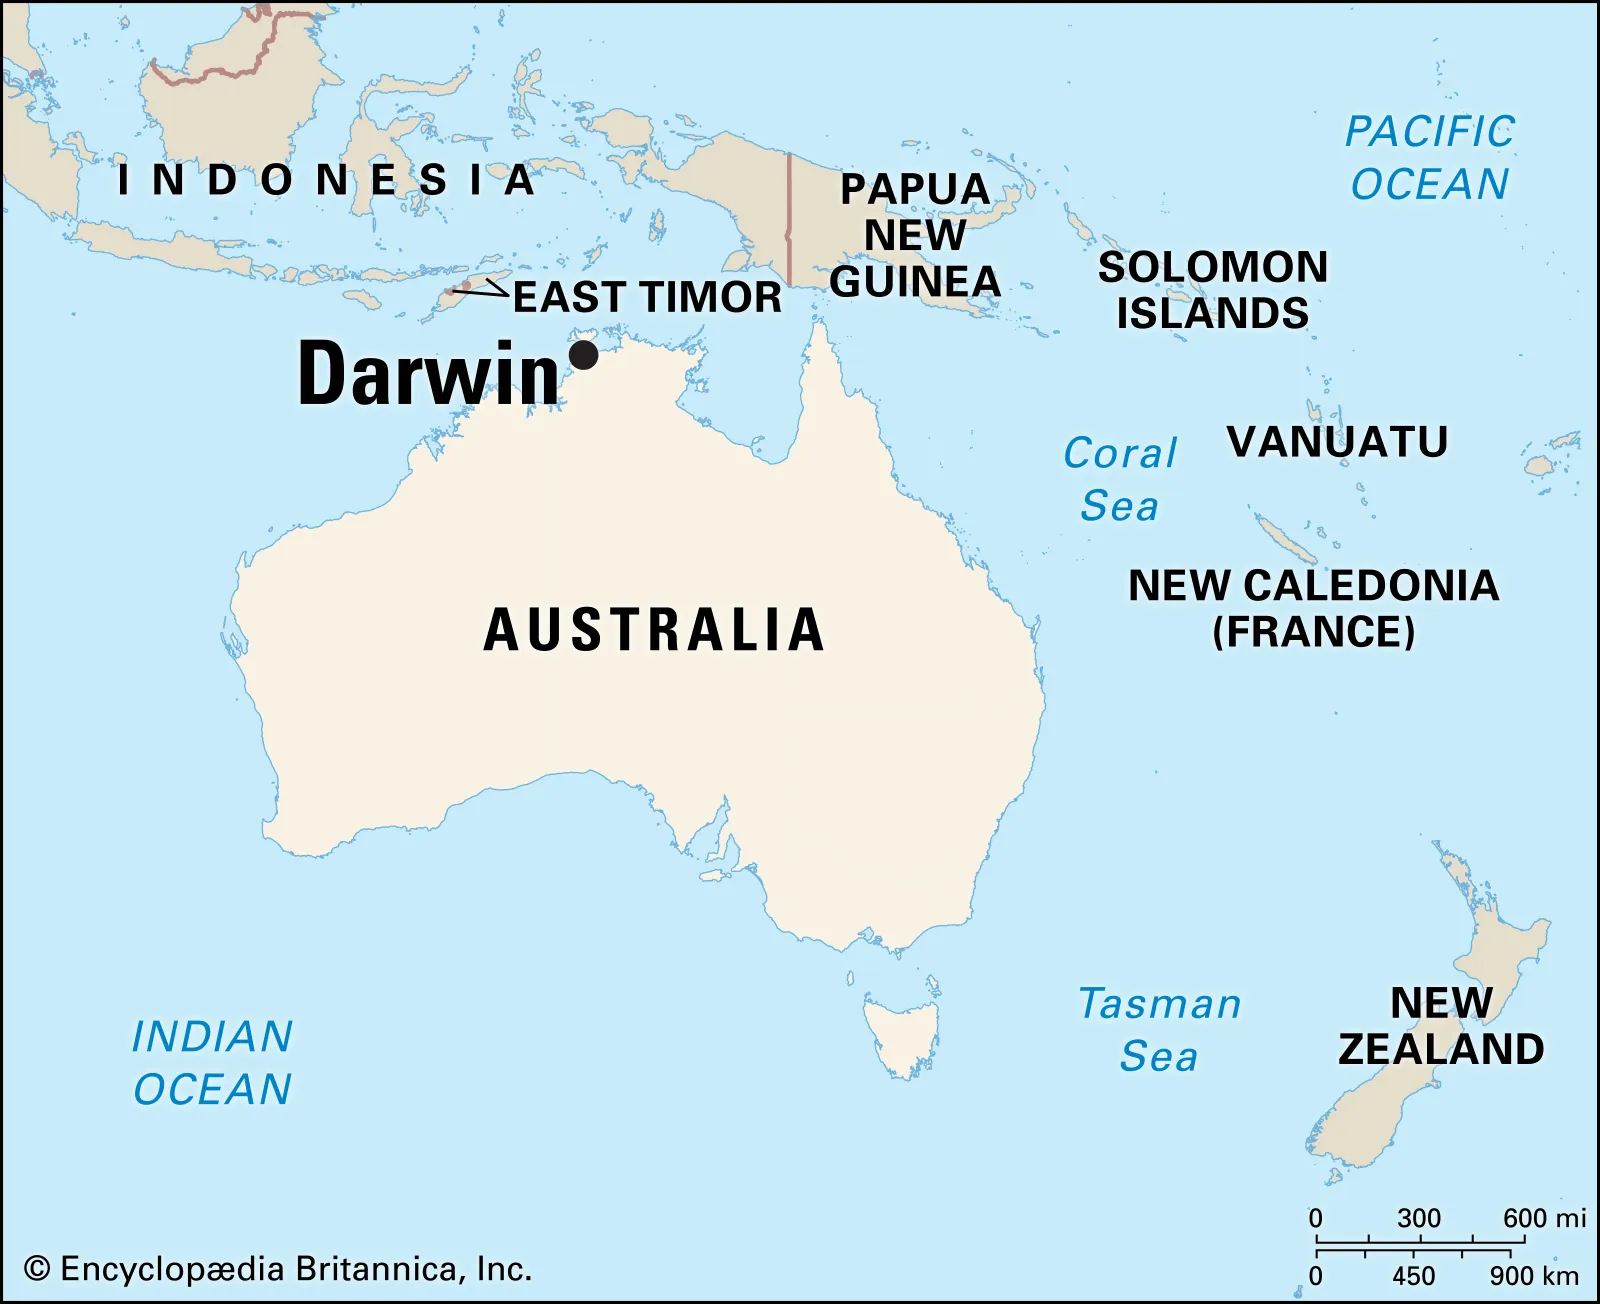

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Cargar el archivo CSV en un DataFrame
file_url='https://raw.githubusercontent.com/ColtdayVal/Clima_Australia/refs/heads/main/Datos%20Climatologicos%20de%20Darwin%20Australia.csv'
df=pd.read_csv(file_url, sep=';')

# **Descripcion de los datos**
Lo primero que haremos es entender los datos, asi que vamos a describir cada uno de los siguientes datos que encontraremos a continuación del dataset.

* Date=La fecha de observación
* Location=El nombre común de la
  ubicación de la estación meteorológica.
* Latitud=Latitud de la ubicación.
* Longitud=Longitud de la ubicación.
* MinTemp=La temperatura mínima en grados centígrados
* MaxTemp=La temperatura máxima en grados centígrados
* Rainfall=La cantidad de lluvia registrada durante el día en mm.
* Evaporation=La denominada evaporación en tanque de clase A (mm) en las 24 horas hasta las 9 a. m.
* Sunshine=El número de horas de sol brillante en el día.
* WindGustDir=La dirección de la ráfaga de viento más fuerte en las 24 horas hasta la medianoche.
* WindGustSpeed=La velocidad (km/h) de la ráfaga de viento más fuerte en las 24 horas hasta la medianoche
* WindDir9am=Dirección del viento a las 9 am
* WindDir3pm=Dirección del viento a las 15h
* WindSpeed9am=Velocidad del viento (km/h) promediada durante 10 minutos antes de las 9 a. m.
* WindSpeed3pm=Velocidad del viento (km/h) promediada durante 10 minutos antes de las 3 p. m.
* Humidity9am=Humedad (porcentaje) a las 9 am
* Humidity3pm=Humedad (porcentaje) a las 3 p. m.
* Pressure9am=La presión atmosférica (hpa) se redujo al nivel medio del mar a las 9 am
* Pressure3pm=La presión atmosférica (hpa) se redujo al nivel medio del mar a las 3 p. m.
* Cloud9am=Fracción del cielo oscurecida por nubes a las 9:00 h. Se mide en "oktas", que son una unidad de octavos.
Registra cuántas octavas partes del cielo están oscurecidas por nubes. Un 0 indica que el cielo está completamente despejado, mientras que un 8 indica que está completamente nublado.
* Cloud3pm=Fracción del cielo oscurecida por las nubes (en "oktas": octavos) a las 15 h. Véase Cload9am para una descripción de los valores.
* Temp9am=Temperatura (grados C) a las 9 am.
* Temp3pm=Temperatura (grados C) a las 3pm.
* RainToday=Booleano: 1 si la precipitación (mm) en las 24 horas hasta las 9 a. m. supera 1 mm, de lo contrario 0.
* RainTomorrow=Cantidad de lluvia del día siguiente en mm. Se utiliza para crear la variable de respuesta RainTomorrow. Una especie de medida del "riesgo".


In [2]:
# Mostrar las primeras filas del DataFrame para entender su estructura
df.head()

Date Location   Latitud   Longitud  MinTemp  MaxTemp  Rainfall  \
0  1/07/2008   Darwin -12.46113  130.84185     20.0     33.1       0.0   
1  2/07/2008   Darwin -12.46113  130.84185     19.4     32.4       0.0   
2  3/07/2008   Darwin -12.46113  130.84185     18.2     31.8       0.0   
3  4/07/2008   Darwin -12.46113  130.84185     17.3     30.7       0.0   
4  5/07/2008   Darwin -12.46113  130.84185     15.5     30.8       0.0   

   Evaporation  Sunshine WindGustDir  ...  Humidity9am Humidity3pm  \
0          4.4      11.0           E  ...         81.0        32.0   
1          6.0      10.4         ENE  ...         81.0        17.0   
2          8.0      11.0           E  ...         38.0        24.0   
3          7.0      10.4           E  ...         55.0        16.0   
4          7.0      10.8         ESE  ...         37.0        16.0   

  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  \
0      1016.0       1012.1       1.0       2.0     25.4     32.3         No   
1      1016.8       1012.4       1.0       1.0     24.3     31.9         No   
2      1017.2       1013.0       0.0       1.0     24.3     31.2         No   
3      1017.3       1013.6       2.0       6.0     21.3     29.8         No   
4      1016.3       1012.6       1.0       1.0     22.2     29.6         No   

   RainTomorrow  
0            No  
1            No  
2            No  
3            No  
4            No  

[5 rows x 25 columns]

**Visualizacion de filas y columnas**

In [3]:
#Cuantos campos y registros tiene la base de datos
df.shape

(3193, 25)

In [4]:
#columnas del dataset
df.columns

Index(['Date', 'Location', 'Latitud', 'Longitud', 'MinTemp', 'MaxTemp',
       'Rainfall', 'Evaporation', 'Sunshine', 'WindGustDir', 'WindGustSpeed',
       'WindDir9am', 'WindDir3pm', 'WindSpeed9am', 'WindSpeed3pm',
       'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am',
       'Cloud3pm', 'Temp9am', 'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

**Cuantos registros para cada campo son nulos**

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3193 entries, 0 to 3192
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           3193 non-null   object 
 1   Location       3193 non-null   object 
 2   Latitud        3193 non-null   float64
 3   Longitud       3193 non-null   float64
 4   MinTemp        3192 non-null   float64
 5   MaxTemp        3192 non-null   float64
 6   Rainfall       3193 non-null   float64
 7   Evaporation    3139 non-null   float64
 8   Sunshine       3189 non-null   float64
 9   WindGustDir    3147 non-null   object 
 10  WindGustSpeed  3151 non-null   float64
 11  WindDir9am     3165 non-null   object 
 12  WindDir3pm     3190 non-null   object 
 13  WindSpeed9am   3191 non-null   float64
 14  WindSpeed3pm   3191 non-null   float64
 15  Humidity9am    3192 non-null   float64
 16  Humidity3pm    3191 non-null   float64
 17  Pressure9am    3192 non-null   float64
 18  Pressure

In [6]:
#Mostrar el tipo de datos que tiene cada campo
df.dtypes

Date              object
Location          object
Latitud          float64
Longitud         float64
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object

In [7]:
#Mostrar los campos tipo Variables cualitativas:
categorical = df.select_dtypes(include = ["object"]).keys()
print(categorical)

Index(['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm',
       'RainToday', 'RainTomorrow'],
      dtype='object')


In [8]:
#Mostrar los campos tipo Variables cuantitativas:
quantitative = df.select_dtypes(include = ["int64","float64"]).keys()
print(quantitative)

Index(['Latitud', 'Longitud', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm',
       'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am',
       'Cloud3pm', 'Temp9am', 'Temp3pm'],
      dtype='object')


# Descripción de los datos


In [9]:
#Descripción de las variables cuantitativas
df[quantitative].describe()

Latitud      Longitud      MinTemp      MaxTemp     Rainfall  \
count  3.193000e+03  3.193000e+03  3192.000000  3192.000000  3193.000000   
mean  -1.246113e+01  1.308419e+02    23.209305    32.540977     5.092452   
std    3.642102e-13  8.186734e-12     2.968970     1.746054    16.450148   
min   -1.246113e+01  1.308418e+02    12.500000    21.900000     0.000000   
25%   -1.246113e+01  1.308418e+02    21.600000    31.600000     0.000000   
50%   -1.246113e+01  1.308418e+02    23.900000    32.800000     0.000000   
75%   -1.246113e+01  1.308418e+02    25.300000    33.700000     1.800000   
max   -1.246113e+01  1.308418e+02    29.700000    38.000000   367.600000   

       Evaporation    Sunshine  WindGustSpeed  WindSpeed9am  WindSpeed3pm  \
count  3139.000000  3189.00000    3151.000000   3191.000000   3191.000000   
mean      6.318668     8.49931      40.582355     15.009088     20.831401   
std       1.869214     3.20916      10.021855      6.881139      6.016469   
min       0.200000     0.00000      15.000000      0.000000      0.000000   
25%       5.200000     7.00000      33.000000      9.000000     17.000000   
50%       6.400000    10.00000      39.000000     15.000000     20.000000   
75%       7.600000    10.90000      46.000000     19.000000     24.000000   
max      19.200000    12.30000     126.000000     63.000000     52.000000   

       Humidity9am  Humidity3pm  Pressure9am  Pressure3pm     Cloud9am  \
count  3192.000000  3191.000000  3192.000000  3191.000000  3192.000000   
mean     68.486216    51.827954  1011.888784  1008.349107     4.337093   
std      15.042251    18.701605     3.354855     2.909659     2.554531   
min      11.000000     5.000000   996.300000   996.000000     0.000000   
25%      62.000000    39.000000  1009.600000  1006.400000     2.000000   
50%      71.000000    53.000000  1012.200000  1008.600000     5.000000   
75%      78.000000    64.000000  1014.400000  1010.500000     7.000000   
max      99.000000    99.000000  1019.300000  1015.400000     8.000000   

          Cloud3pm      Temp9am      Temp3pm  
count  3190.000000  3193.000000  3191.000000  
mean      4.310345    27.185625    31.082733  
std       2.578511     2.727536     2.090846  
min       0.000000    16.700000    19.000000  
25%       2.000000    25.500000    29.900000  
50%       5.000000    27.800000    31.500000  
75%       7.000000    29.300000    32.600000  
max       8.000000    32.200000    37.400000

In [10]:
#Descripción de las variables cualitativos
df[categorical].describe()

Date Location WindGustDir WindDir9am WindDir3pm RainToday  \
count        3193     3193        3147       3165       3190      3193   
unique       3193        1          16         16         16         2   
top     1/07/2008   Darwin           E         SE        WNW        No   
freq            1     3193         523        480        550      2341   

       RainTomorrow  
count          3192  
unique            2  
top              No  
freq           2340

# **Manipulación de datos**

# Transformación de la fecha
Sacar del campo Date, el año (year), mes (month), dia (day)

In [11]:
#Transformar el campo 'Date':
df['Date'] = pd.to_datetime(df['Date'],format="%d/%m/%Y")
df['year'] = df['Date'].dt.year
df['month'] = df['Date'].dt.month
df['day'] = df['Date'].dt.day
df.head()

Date Location   Latitud   Longitud  MinTemp  MaxTemp  Rainfall  \
0 2008-07-01   Darwin -12.46113  130.84185     20.0     33.1       0.0   
1 2008-07-02   Darwin -12.46113  130.84185     19.4     32.4       0.0   
2 2008-07-03   Darwin -12.46113  130.84185     18.2     31.8       0.0   
3 2008-07-04   Darwin -12.46113  130.84185     17.3     30.7       0.0   
4 2008-07-05   Darwin -12.46113  130.84185     15.5     30.8       0.0   

   Evaporation  Sunshine WindGustDir  ...  Pressure3pm Cloud9am Cloud3pm  \
0          4.4      11.0           E  ...       1012.1      1.0      2.0   
1          6.0      10.4         ENE  ...       1012.4      1.0      1.0   
2          8.0      11.0           E  ...       1013.0      0.0      1.0   
3          7.0      10.4           E  ...       1013.6      2.0      6.0   
4          7.0      10.8         ESE  ...       1012.6      1.0      1.0   

   Temp9am  Temp3pm  RainToday  RainTomorrow  year  month  day  
0     25.4     32.3         No            No  2008      7    1  
1     24.3     31.9         No            No  2008      7    2  
2     24.3     31.2         No            No  2008      7    3  
3     21.3     29.8         No            No  2008      7    4  
4     22.2     29.6         No            No  2008      7    5  

[5 rows x 28 columns]

# **Data Wrangling - Limpieza y transformación de datos**

**Valores duplicados**

In [12]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
3188    False
3189    False
3190    False
3191    False
3192    False
Length: 3193, dtype: bool

In [13]:
df.drop_duplicates()

Date Location   Latitud   Longitud  MinTemp  MaxTemp  Rainfall  \
0    2008-07-01   Darwin -12.46113  130.84185     20.0     33.1       0.0   
1    2008-07-02   Darwin -12.46113  130.84185     19.4     32.4       0.0   
2    2008-07-03   Darwin -12.46113  130.84185     18.2     31.8       0.0   
3    2008-07-04   Darwin -12.46113  130.84185     17.3     30.7       0.0   
4    2008-07-05   Darwin -12.46113  130.84185     15.5     30.8       0.0   
...         ...      ...       ...        ...      ...      ...       ...   
3188 2017-06-21   Darwin -12.46113  130.84185     21.2     32.6       0.0   
3189 2017-06-22   Darwin -12.46113  130.84185     20.7     32.8       0.0   
3190 2017-06-23   Darwin -12.46113  130.84185     19.5     31.8       0.0   
3191 2017-06-24   Darwin -12.46113  130.84185     20.2     31.7       0.0   
3192 2017-06-25   Darwin -12.46113  130.84185     19.3      NaN       0.0   

      Evaporation  Sunshine WindGustDir  ...  Pressure3pm Cloud9am Cloud3pm  \
0             4.4      11.0           E  ...       1012.1      1.0      2.0   
1             6.0      10.4         ENE  ...       1012.4      1.0      1.0   
2             8.0      11.0           E  ...       1013.0      0.0      1.0   
3             7.0      10.4           E  ...       1013.6      2.0      6.0   
4             7.0      10.8         ESE  ...       1012.6      1.0      1.0   
...           ...       ...         ...  ...          ...      ...      ...   
3188          7.6       8.6           E  ...       1011.2      7.0      0.0   
3189          5.6      11.0           E  ...       1011.8      0.0      0.0   
3190          6.2      10.6         ESE  ...       1010.7      1.0      1.0   
3191          5.6      10.7         ENE  ...       1009.7      6.0      5.0   
3192          5.0       NaN         NaN  ...       1010.7      6.0      1.0   

      Temp9am  Temp3pm  RainToday  RainTomorrow  year  month  day  
0        25.4     32.3         No            No  2008      7    1  
1        24.3     31.9         No            No  2008      7    2  
2        24.3     31.2         No            No  2008      7    3  
3        21.3     29.8         No            No  2008      7    4  
4        22.2     29.6         No            No  2008      7    5  
...       ...      ...        ...           ...   ...    ...  ...  
3188     24.8     32.0         No            No  2017      6   21  
3189     24.8     32.1         No            No  2017      6   22  
3190     24.8     29.2         No            No  2017      6   23  
3191     25.4     31.0         No            No  2017      6   24  
3192     24.6     29.0         No           NaN  2017      6   25  

[3193 rows x 28 columns]

No se encontraron valores duplicados en la base de datos

**Valores nulos**


In [14]:
#Identificación de valores perdidos cualitativos
valores_perdidos_cualitativos=df[categorical].isnull().sum()
print("Valores perdidos por columna:\n", valores_perdidos_cualitativos)

Valores perdidos por columna:
 Date             0
Location         0
WindGustDir     46
WindDir9am      28
WindDir3pm       3
RainToday        0
RainTomorrow     1
dtype: int64


In [15]:
#Identificación de valores perdidos cuantitativos
valores_perdidos_cuantitativos=df[quantitative].isnull().sum()
print("Valores perdidos por columna:\n", valores_perdidos_cuantitativos)

Valores perdidos por columna:
 Latitud           0
Longitud          0
MinTemp           1
MaxTemp           1
Rainfall          0
Evaporation      54
Sunshine          4
WindGustSpeed    42
WindSpeed9am      2
WindSpeed3pm      2
Humidity9am       1
Humidity3pm       2
Pressure9am       1
Pressure3pm       2
Cloud9am          1
Cloud3pm          3
Temp9am           0
Temp3pm           2
dtype: int64


**Imputación de datos nulos**

No tenemos en cuenta los valores ceros por que hay a pesar de que hay valores en cero para las variables hay que tener en cuenta que el contexto de estos campos, por lo tanto, es normal que haya valores ceros en los datos

In [16]:
#borrar registros con datos nulos
df_clean = df.dropna()
df_clean

Date Location   Latitud   Longitud  MinTemp  MaxTemp  Rainfall  \
0    2008-07-01   Darwin -12.46113  130.84185     20.0     33.1       0.0   
1    2008-07-02   Darwin -12.46113  130.84185     19.4     32.4       0.0   
2    2008-07-03   Darwin -12.46113  130.84185     18.2     31.8       0.0   
3    2008-07-04   Darwin -12.46113  130.84185     17.3     30.7       0.0   
4    2008-07-05   Darwin -12.46113  130.84185     15.5     30.8       0.0   
...         ...      ...       ...        ...      ...      ...       ...   
3187 2017-06-20   Darwin -12.46113  130.84185     19.3     33.4       0.0   
3188 2017-06-21   Darwin -12.46113  130.84185     21.2     32.6       0.0   
3189 2017-06-22   Darwin -12.46113  130.84185     20.7     32.8       0.0   
3190 2017-06-23   Darwin -12.46113  130.84185     19.5     31.8       0.0   
3191 2017-06-24   Darwin -12.46113  130.84185     20.2     31.7       0.0   

      Evaporation  Sunshine WindGustDir  ...  Pressure3pm Cloud9am Cloud3pm  \
0             4.4      11.0           E  ...       1012.1      1.0      2.0   
1             6.0      10.4         ENE  ...       1012.4      1.0      1.0   
2             8.0      11.0           E  ...       1013.0      0.0      1.0   
3             7.0      10.4           E  ...       1013.6      2.0      6.0   
4             7.0      10.8         ESE  ...       1012.6      1.0      1.0   
...           ...       ...         ...  ...          ...      ...      ...   
3187          6.0      11.0         ENE  ...       1010.5      0.0      1.0   
3188          7.6       8.6           E  ...       1011.2      7.0      0.0   
3189          5.6      11.0           E  ...       1011.8      0.0      0.0   
3190          6.2      10.6         ESE  ...       1010.7      1.0      1.0   
3191          5.6      10.7         ENE  ...       1009.7      6.0      5.0   

      Temp9am  Temp3pm  RainToday  RainTomorrow  year  month  day  
0        25.4     32.3         No            No  2008      7    1  
1        24.3     31.9         No            No  2008      7    2  
2        24.3     31.2         No            No  2008      7    3  
3        21.3     29.8         No            No  2008      7    4  
4        22.2     29.6         No            No  2008      7    5  
...       ...      ...        ...           ...   ...    ...  ...  
3187     24.5     32.3         No            No  2017      6   20  
3188     24.8     32.0         No            No  2017      6   21  
3189     24.8     32.1         No            No  2017      6   22  
3190     24.8     29.2         No            No  2017      6   23  
3191     25.4     31.0         No            No  2017      6   24  

[3062 rows x 28 columns]

Como podemos ver si eliminamos los registros con campos vacios nos quedan 3062 registros de 3193



In [17]:
df_clean.shape

(3062, 28)

Por otro lado, identificamos campos irregulares mediante el uso de los histogramas para identificar cuales datos nos puede ayudar

**Uso de histogramas para identificar irregularidades en la base de datos**

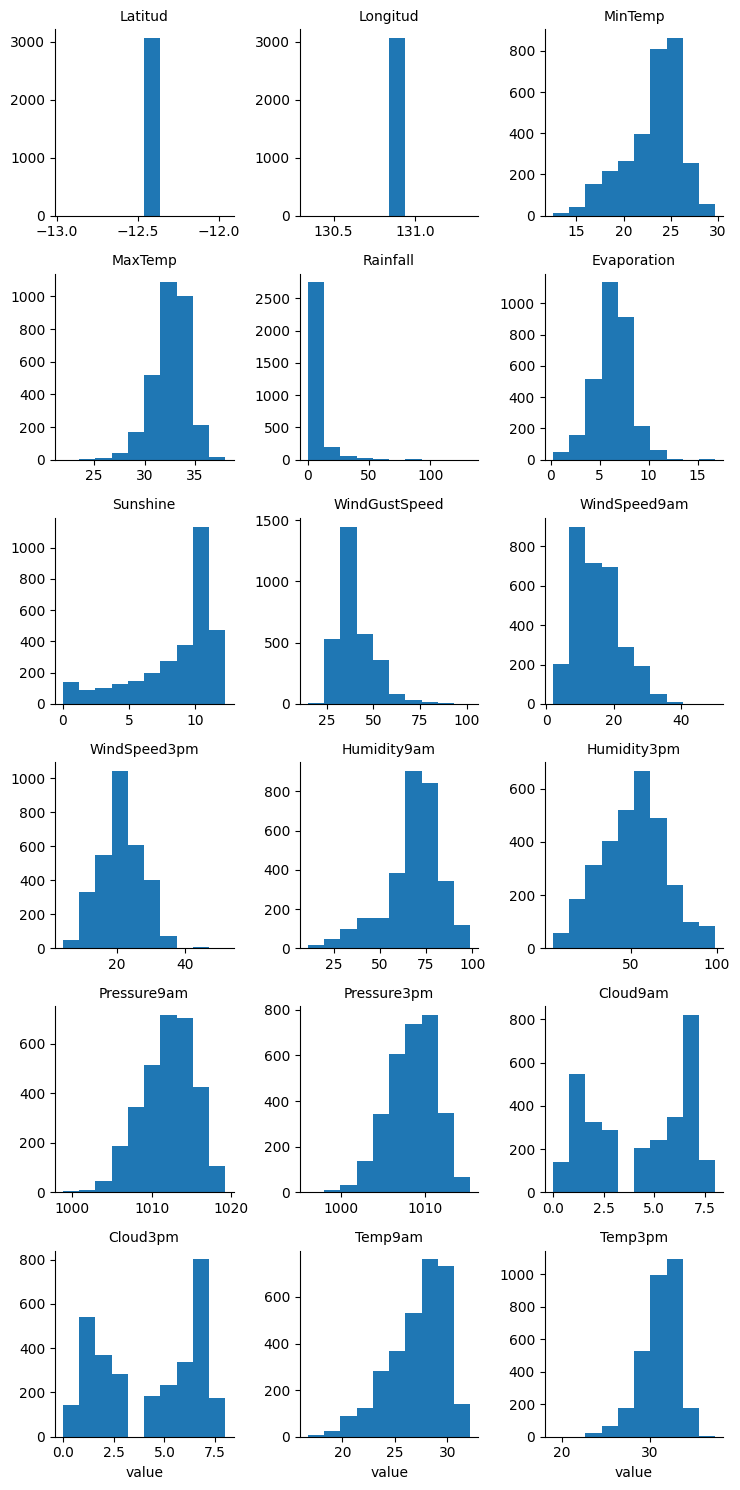

In [18]:
#Identificar valores irregulares mediante el uso de histogramas para el df limpio
#Mostrar histogramas de las variables cuantitativas:
g = sns.FacetGrid(df_clean.melt(value_vars=quantitative), col='variable', col_wrap=3, sharex=False, sharey=False, height=2.5)
g.map(plt.hist, 'value')
g.set_titles("{col_name}")
plt.show()
#plt.figure(figsize=(15, 15))
#df[quantitative].hist()

No se observan irregularidades en los histogramas de las variables cuantitativas

**Tratamiento de valores outliers**

Sacamos el campo Rainfall ya que es que nos indica cuanta lluvia cayo en mm en el día, por lo tanto es un dato que no tiene una distribuicion normal

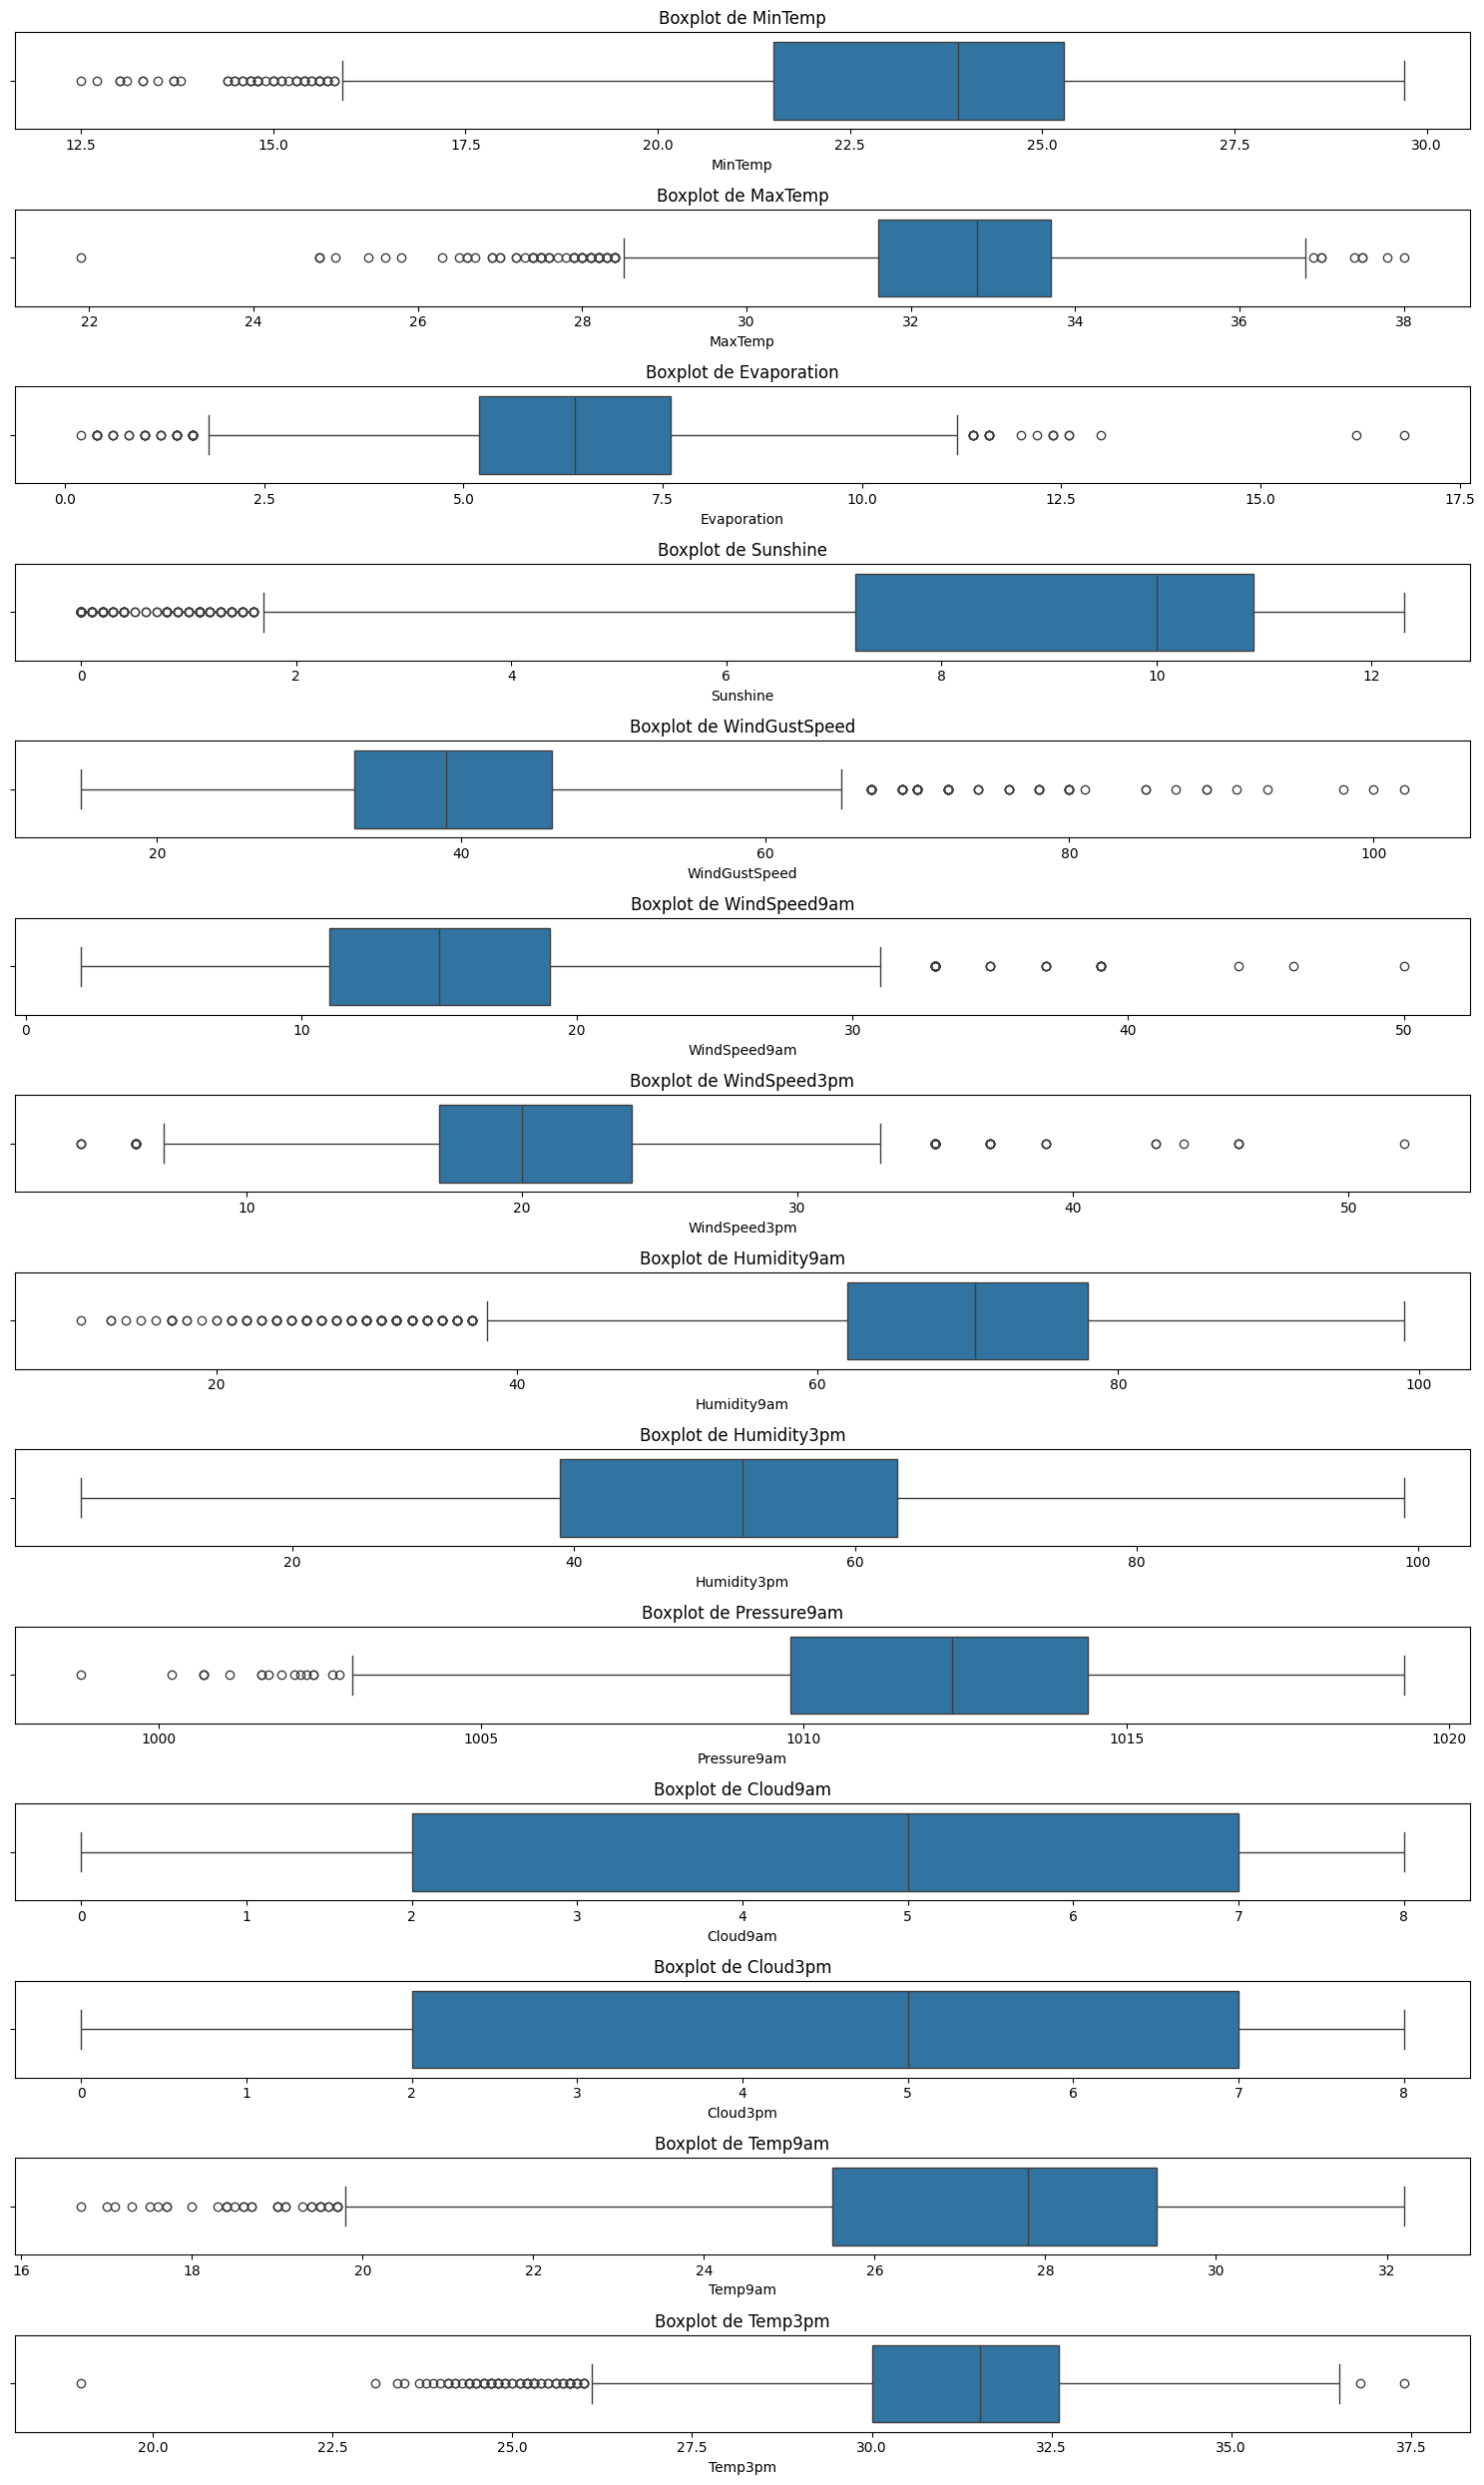

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Listado de columnas que deseas analizar
columnas = [
    'MinTemp', 'MaxTemp', 'Evaporation', 'Sunshine',
    'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm',
    'Humidity9am', 'Humidity3pm', 'Pressure9am',
    'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm'
]

# Configuración del tamaño de la gráfica
plt.figure(figsize=(15, 25))

# Crear un boxplot para cada columna
for i, columna in enumerate(columnas, 1):
    plt.subplot(len(columnas), 1, i)
    sns.boxplot(data=df_clean, x=columna)
    plt.title(f'Boxplot de {columna}')

plt.tight_layout()
plt.show()


# **Identificación de los outliners de los campos cuantitativos**

In [20]:
# Lista de columnas para las cuales se eliminarán los outliers
columnas = [
    'MinTemp', 'MaxTemp', 'Evaporation', 'Sunshine',
    'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm',
    'Humidity9am', 'Humidity3pm', 'Pressure9am',
    'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm'
]

# Crear una copia del DataFrame para mantener los datos originales
df_clean_outliers = df_clean.copy()

# Eliminar outliers usando el método de IQR
for columna in columnas:
    Q1 = df_clean_outliers[columna].quantile(0.25)
    Q3 = df_clean_outliers[columna].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filtrar los datos manteniendo solo los valores dentro del rango
    df_clean_outliers = df_clean_outliers[(df_clean_outliers[columna] >= lower_bound) & (df_clean_outliers[columna] <= upper_bound)]

# Verificar la limpieza de outliers
print("Datos después de eliminar outliers:")
print(df_clean_outliers.describe())

Datos después de eliminar outliers:
                                Date       Latitud      Longitud      MinTemp  \
count                           2374  2.374000e+03  2.374000e+03  2374.000000   
mean   2013-01-20 10:20:31.339511296 -1.246113e+01  1.308418e+02    23.503749   
min              2008-07-01 00:00:00 -1.246113e+01  1.308418e+02    15.900000   
25%              2010-09-03 12:00:00 -1.246113e+01  1.308418e+02    22.100000   
50%              2013-03-28 12:00:00 -1.246113e+01  1.308418e+02    24.000000   
75%              2015-05-03 18:00:00 -1.246113e+01  1.308418e+02    25.400000   
max              2017-06-24 00:00:00 -1.246113e+01  1.308418e+02    29.700000   
std                              NaN  2.647329e-13  1.989939e-12     2.614005   

           MaxTemp     Rainfall  Evaporation     Sunshine  WindGustSpeed  \
count  2374.000000  2374.000000  2374.000000  2374.000000    2374.000000   
mean     32.957161     2.699326     6.308551     9.168955      38.524010   
min   

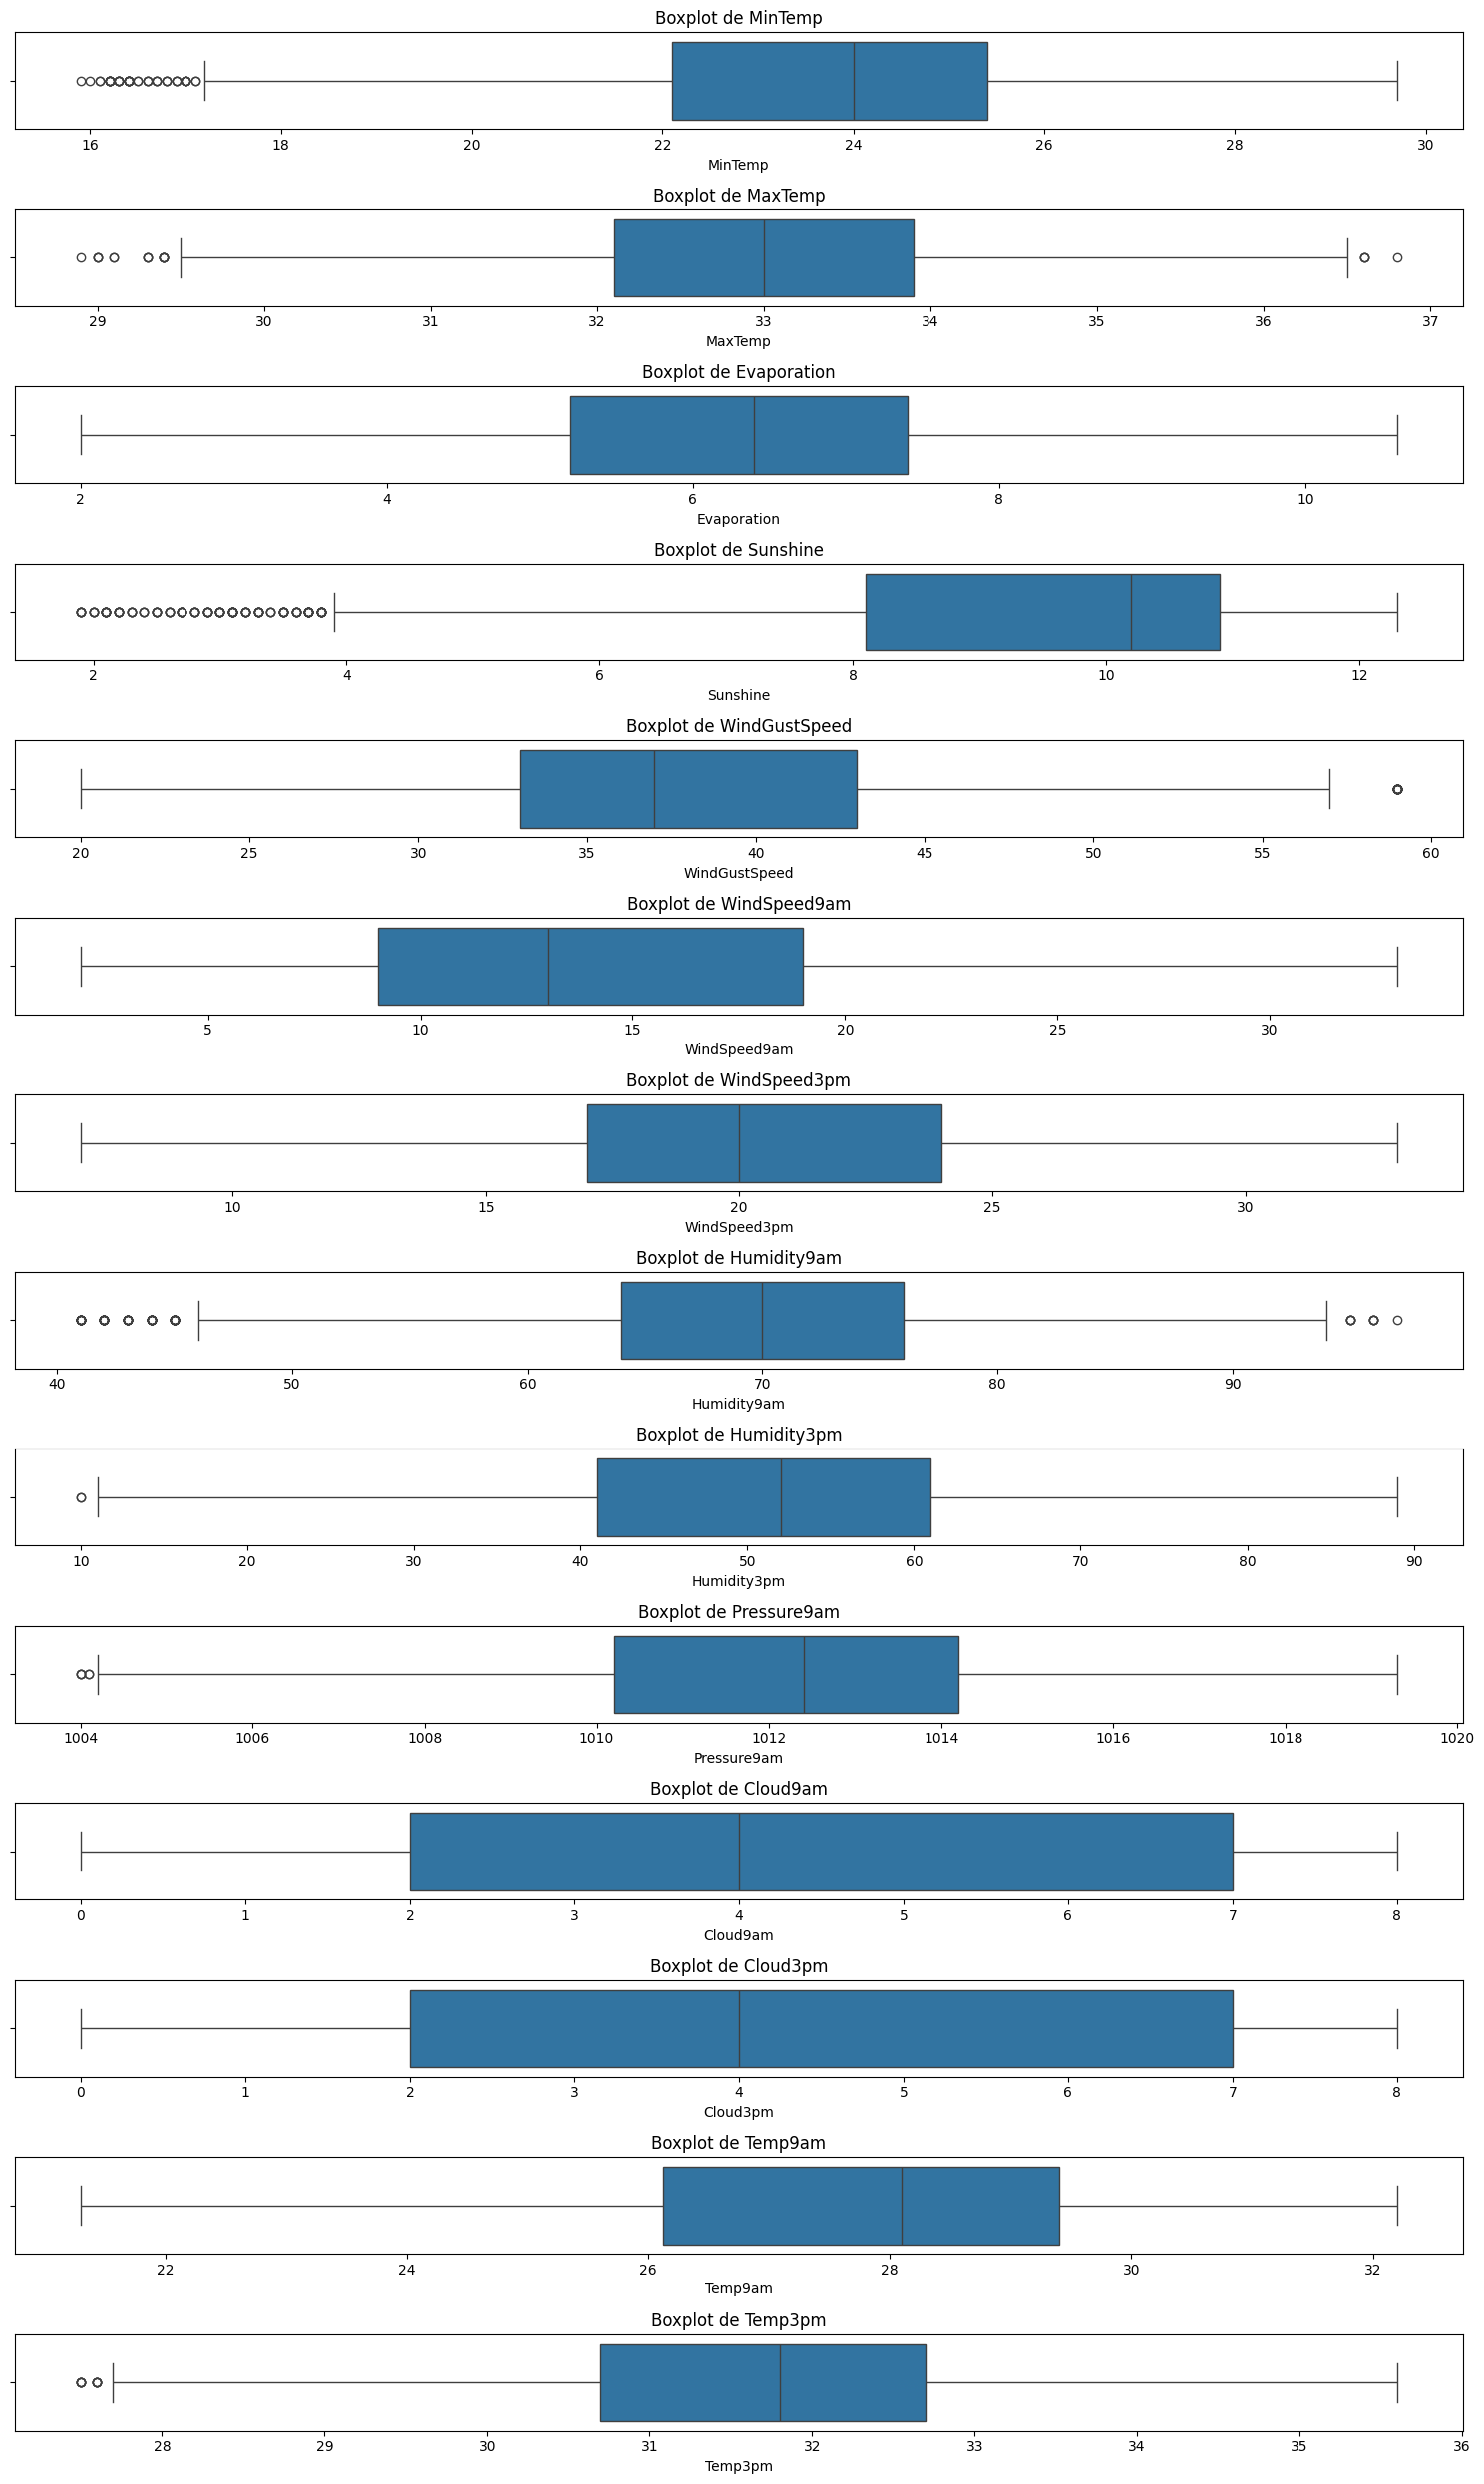

In [21]:
# Listado de columnas que deseas analizar
columnas = [
    'MinTemp', 'MaxTemp',  'Evaporation', 'Sunshine',
    'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm',
    'Humidity9am', 'Humidity3pm', 'Pressure9am',
    'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm'
]

# Configuración del tamaño de la gráfica
plt.figure(figsize=(15, 25))

# Crear un boxplot para cada columna
for i, columna in enumerate(columnas, 1):
    plt.subplot(len(columnas), 1, i)
    sns.boxplot(data=df_clean_outliers, x=columna)
    plt.title(f'Boxplot de {columna}')

plt.tight_layout()
plt.show()

# **Análisis Exploratorio de datos**

In [22]:
#Mostrar los campos tipo Variables cuantitativas:
quantitative = df_clean_outliers[['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm',
       'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am',
       'Cloud3pm', 'Temp9am', 'Temp3pm']].keys()
print(quantitative)

#Mostrar los campos tipo Variables cualitativas:
categorical = df_clean_outliers.select_dtypes(include = ["object"]).keys()
print(categorical)

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm'],
      dtype='object')
Index(['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday',
       'RainTomorrow'],
      dtype='object')


In [23]:
df_clean_outliers.describe()

Date       Latitud      Longitud      MinTemp  \
count                           2374  2.374000e+03  2.374000e+03  2374.000000   
mean   2013-01-20 10:20:31.339511296 -1.246113e+01  1.308418e+02    23.503749   
min              2008-07-01 00:00:00 -1.246113e+01  1.308418e+02    15.900000   
25%              2010-09-03 12:00:00 -1.246113e+01  1.308418e+02    22.100000   
50%              2013-03-28 12:00:00 -1.246113e+01  1.308418e+02    24.000000   
75%              2015-05-03 18:00:00 -1.246113e+01  1.308418e+02    25.400000   
max              2017-06-24 00:00:00 -1.246113e+01  1.308418e+02    29.700000   
std                              NaN  2.647329e-13  1.989939e-12     2.614005   

           MaxTemp     Rainfall  Evaporation     Sunshine  WindGustSpeed  \
count  2374.000000  2374.000000  2374.000000  2374.000000    2374.000000   
mean     32.957161     2.699326     6.308551     9.168955      38.524010   
min      28.900000     0.000000     2.000000     1.900000      20.000000   
25%      32.100000     0.000000     5.200000     8.100000      33.000000   
50%      33.000000     0.000000     6.400000    10.200000      37.000000   
75%      33.900000     0.400000     7.400000    10.900000      43.000000   
max      36.800000    91.000000    10.600000    12.300000      59.000000   
std       1.333815     7.733153     1.573380     2.354433       7.405882   

       WindSpeed9am  ...  Humidity3pm  Pressure9am  Pressure3pm     Cloud9am  \
count   2374.000000  ...  2374.000000  2374.000000  2374.000000  2374.000000   
mean      14.239259  ...    50.673968  1012.134499  1008.508930     4.137742   
min        2.000000  ...    10.000000  1004.000000  1001.100000     0.000000   
25%        9.000000  ...    41.000000  1010.200000  1006.800000     2.000000   
50%       13.000000  ...    52.000000  1012.400000  1008.700000     4.000000   
75%       19.000000  ...    61.000000  1014.200000  1010.400000     7.000000   
max       33.000000  ...    89.000000  1019.300000  1015.400000     8.000000   
std        5.945819  ...    14.294708     2.848571     2.508505     2.454470   

          Cloud3pm      Temp9am      Temp3pm         year        month  \
count  2374.000000  2374.000000  2374.000000  2374.000000  2374.000000   
mean      4.100674    27.662511    31.656950  2012.545914     6.639427   
min       0.000000    21.300000    27.500000  2008.000000     1.000000   
25%       2.000000    26.125000    30.700000  2010.000000     4.000000   
50%       4.000000    28.100000    31.800000  2013.000000     7.000000   
75%       7.000000    29.400000    32.700000  2015.000000    10.000000   
max       8.000000    32.200000    35.600000  2017.000000    12.000000   
std       2.420845     2.236880     1.491595     2.639652     3.324515   

               day  
count  2374.000000  
mean     15.721567  
min       1.000000  
25%       8.000000  
50%      16.000000  
75%      23.000000  
max      31.000000  
std       8.838032  

[8 rows x 22 columns]

# **Analisis univariado**

**Mapa de lluvia maxima de Darwin**

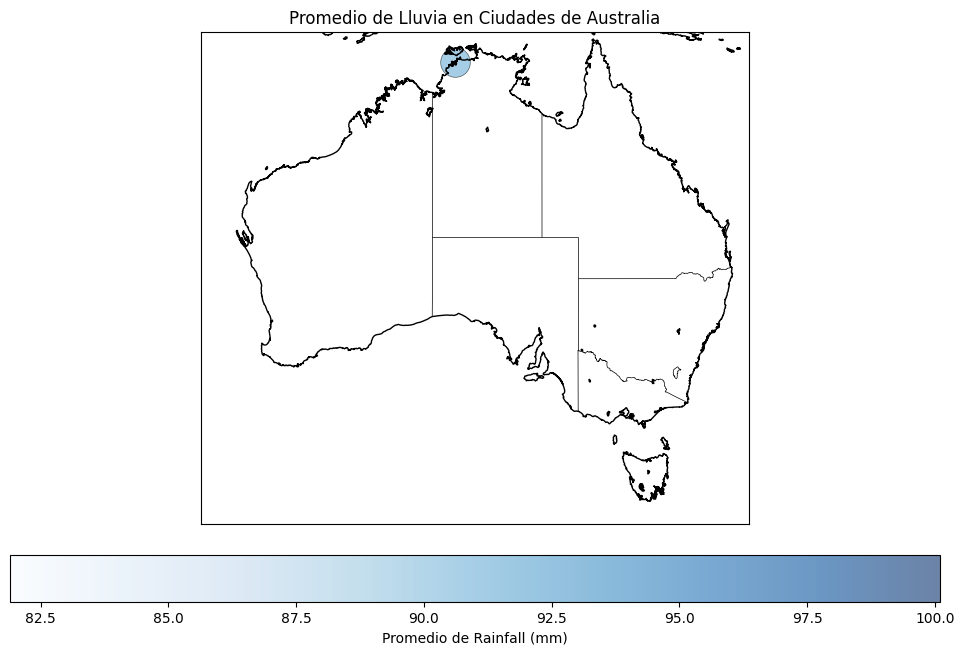

In [76]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

# Supongamos que tienes tus datos en un archivo CSV
# df = pd.read_csv("ruta_a_tu_archivo.csv")

# Para este ejemplo, asumo que ya tienes tu DataFrame cargado como `df`
# Agrupamos los datos por Location para obtener el promedio de Rainfall por ciudad
rainfall_by_location = df_clean_outliers.groupby(['Location', 'Latitud', 'Longitud'])['Rainfall'].max().reset_index()

# Creamos una figura y un eje usando Matplotlib
fig, ax = plt.subplots(figsize=(12, 8))

# Creamos el mapa base utilizando Basemap centrado en Australia
mapa = Basemap(projection='merc', llcrnrlat=-45, urcrnrlat=-10, llcrnrlon=110, urcrnrlon=155, resolution='i', ax=ax)
mapa.drawcoastlines()
mapa.drawcountries()
mapa.drawstates()

# Convertimos las coordenadas de latitud y longitud a las coordenadas del mapa
rainfall_by_location['x'], rainfall_by_location['y'] = mapa(rainfall_by_location['Longitud'].values, rainfall_by_location['Latitud'].values)

# Graficamos los puntos, con un tamaño proporcional a la cantidad promedio de Rainfall
sc = ax.scatter(rainfall_by_location['x'], rainfall_by_location['y'],
                s=rainfall_by_location['Rainfall']*5,  # Ajusta el factor para cambiar el tamaño del punto
                c=rainfall_by_location['Rainfall'], cmap='Blues', alpha=0.6, edgecolor='k', linewidth=0.5)

# Agregamos una barra de color para ver la escala de lluvia
cbar = plt.colorbar(sc, ax=ax, orientation='horizontal', pad=0.05)
cbar.set_label("Promedio de Rainfall (mm)")

# Título y etiquetas
plt.title("Promedio de Lluvia en Ciudades de Australia")
plt.show()


**Analisis de variables cuantitativas**

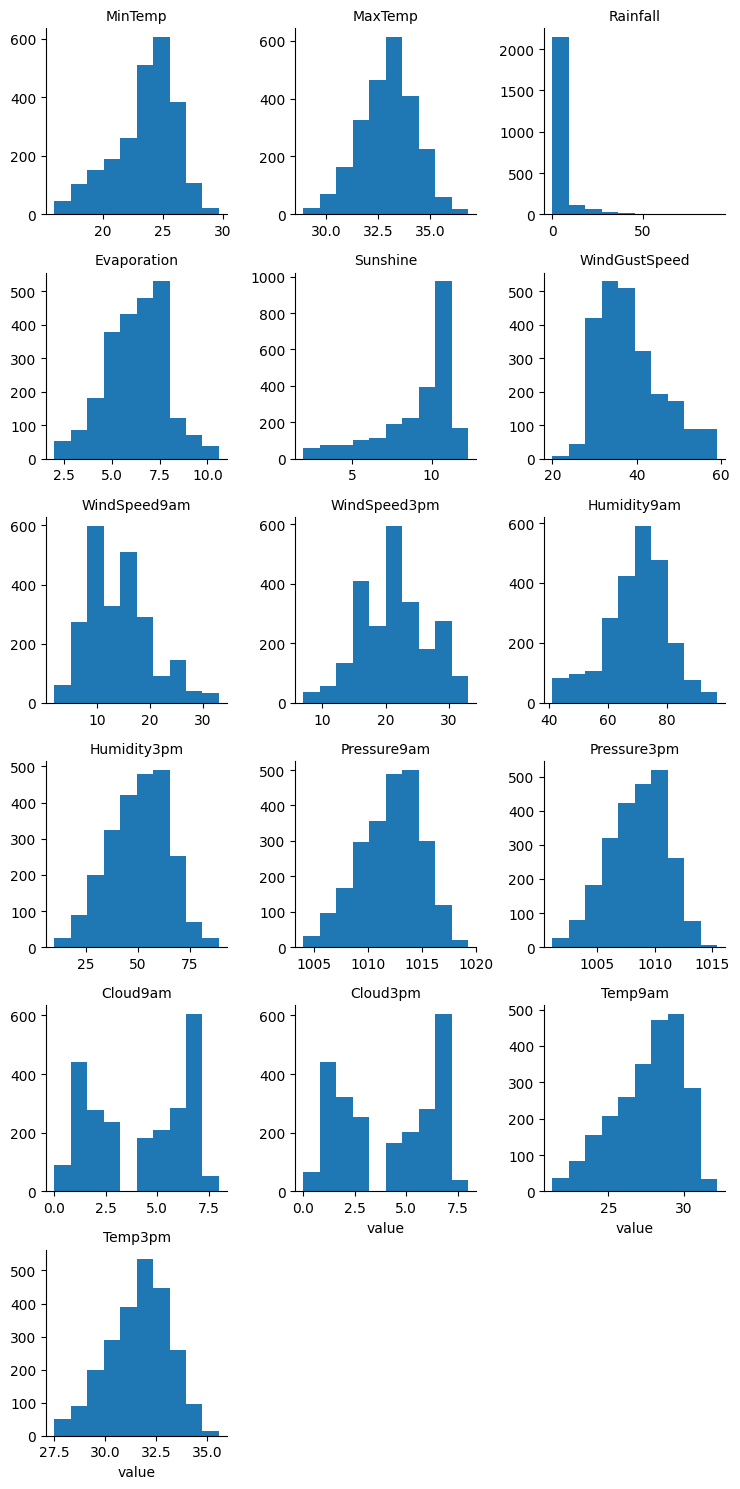

In [24]:
#histogramas para el df limpio
#Mostrar histogramas de las variables cuantitativas:
g = sns.FacetGrid(df_clean_outliers.melt(value_vars=quantitative), col='variable', col_wrap=3, sharex=False, sharey=False, height=2.5)
g.map(plt.hist, 'value')
g.set_titles("{col_name}")
plt.show()
#plt.figure(figsize=(15, 15))
#df[quantitative].hist()

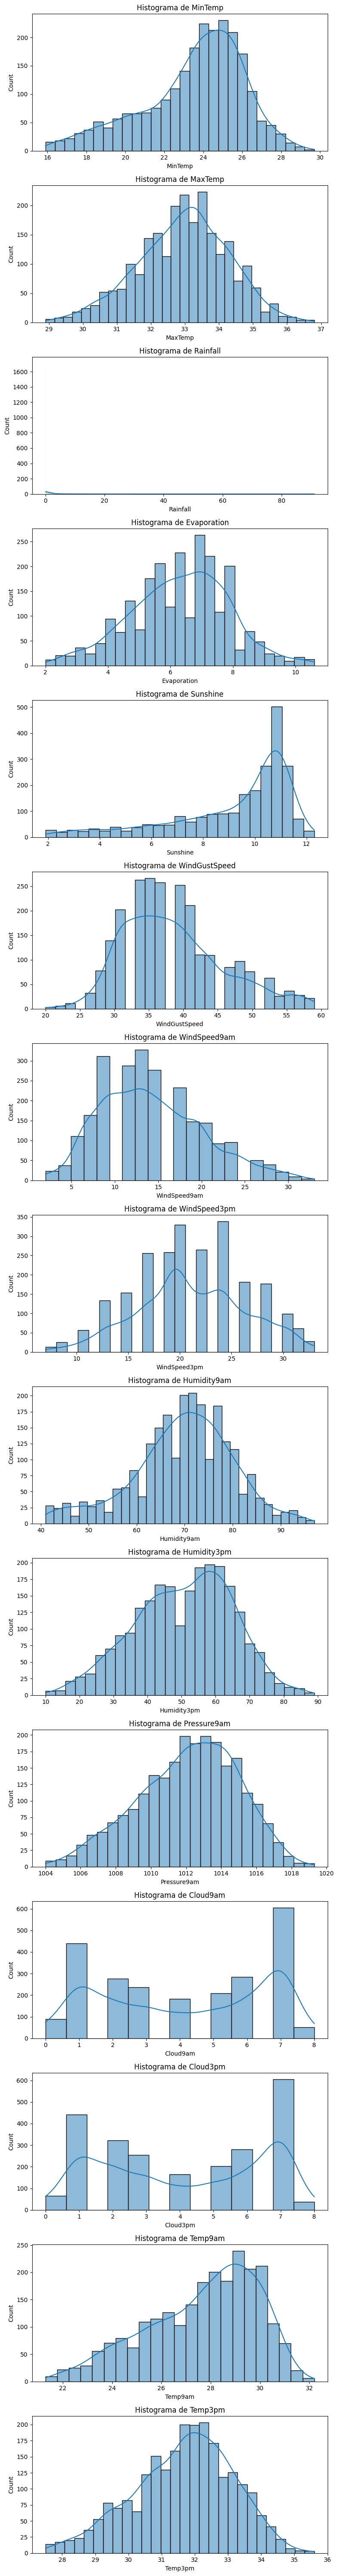

In [25]:
# Variables cuantitativas
cuantitativas = [
    'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
    'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm',
    'Humidity9am', 'Humidity3pm', 'Pressure9am',
    'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm'
]

# Histogramas para cada variable cuantitativa
plt.figure(figsize=(15, 60))
for i, col in enumerate(cuantitativas, 1):
    plt.subplot(len(cuantitativas), 2, 2 * i - 1)
    sns.histplot(df_clean_outliers[col].dropna(), kde=True)
    plt.title(f'Histograma de {col}')
plt.tight_layout()
plt.show()

Seguiremos utilizando la base de datos *df_clean* para el siguiente estudio, ya que eliminamos los registros que contenian valores nulos y quedaron 3062 registros, los cuales nos pueden ayudar a realizar el estudio.

A pesar de borrar los registros con datos nulos podemos observar que los histogramas de las variables cuantitativas no se han visto afectadas, como podemos observar tenemos diferentes tipos de histogramas que nos pueden indicar

* **Histograma de Temperatura (MinTemp, MaxTemp, Temp9am y Temp3pm)**: Los histogramas de las temperturas se inclinan hacia la izquierda, significa que la mayoria de las temperaturas se concentran en los valores altos, es decir que hubo mas días o momentos en donde la temperatura fue elevada, y se registraron pocas temperaturas bajas, tambien los datos de la cola del histograma  nos indica que hubo momentos o dias excepcionalmente frios los dias estudiados.

* **Histograma de Evaporación (Evaporation)**: El histograma de evaporacion nos indica que hubo periodos en que la evaporacion fue menos, y hay pocos días o momentos donde la evaporacion fue elevada.

* **Histograma del número de horas de sol brillante en el día (Sunshine)**: El histograma de Sunshine nos indica que hubo mas días con una alta cantidad de horas de luz solar y hay pocos días nublados o poca luz solar.

* **Histograma de velocidad del viento (WindGustSpeed,WindSpeed9am,WindSpeed3pm)**: Los histogramas de velocidad del viento nos indiga que hubo momentos en los que el viento sopló con poca fuerza y se registraron pocos casos de vientos fuertes.

* **Histograma de humedad (Humidity9am,Humidity3pm)**: El histograma de las 9am nos indica que a esa hora la humedad relativa es alta pero no tan alta como la humedad relativa que hay a las 3 pm, indicando que es un ambiente humedo, y la humedad se mantiene bastante constantes a lo largo del tiempo.

* **Histograma de Presion (Pressure9am,Pressure3pm)**: los histogramas nos indican que hubo más momentos en los que la presión atmosférica fue elevada, esta en un rango entre 1000 y 1020 pMa.

* **Histograma de Fracción del cielo oscurecida por las nubes (Cloud9am, Cloud3pm)**: Estos histogramas son bimodales lo cual nos indican o que esta muy despejado o esta muy cubierto, cuando esta despejado el pico de la derecha corresponderá a valores bajos de oktas, indicando que el cielo está mayormente despejado y cuando esta cubierto el pico de la izquierda corresponderá a valores altos de oktas, indicando que el cielo está casi completamente cubierto de nubes.

* **Histograma de Lluvia (Rainfall)**: Este Histograma nos indica que la mayoria de los días son registrados tuvieron poca o ninguna precipitación, los eventos de lluvia muy fuertes son menos comunes y ocurren con menor frecuencia. Este tipo de distribución de la lluvia es típico de regiones con climas secos o semiáridos, donde los períodos secos son más prolongados que los húmedos.









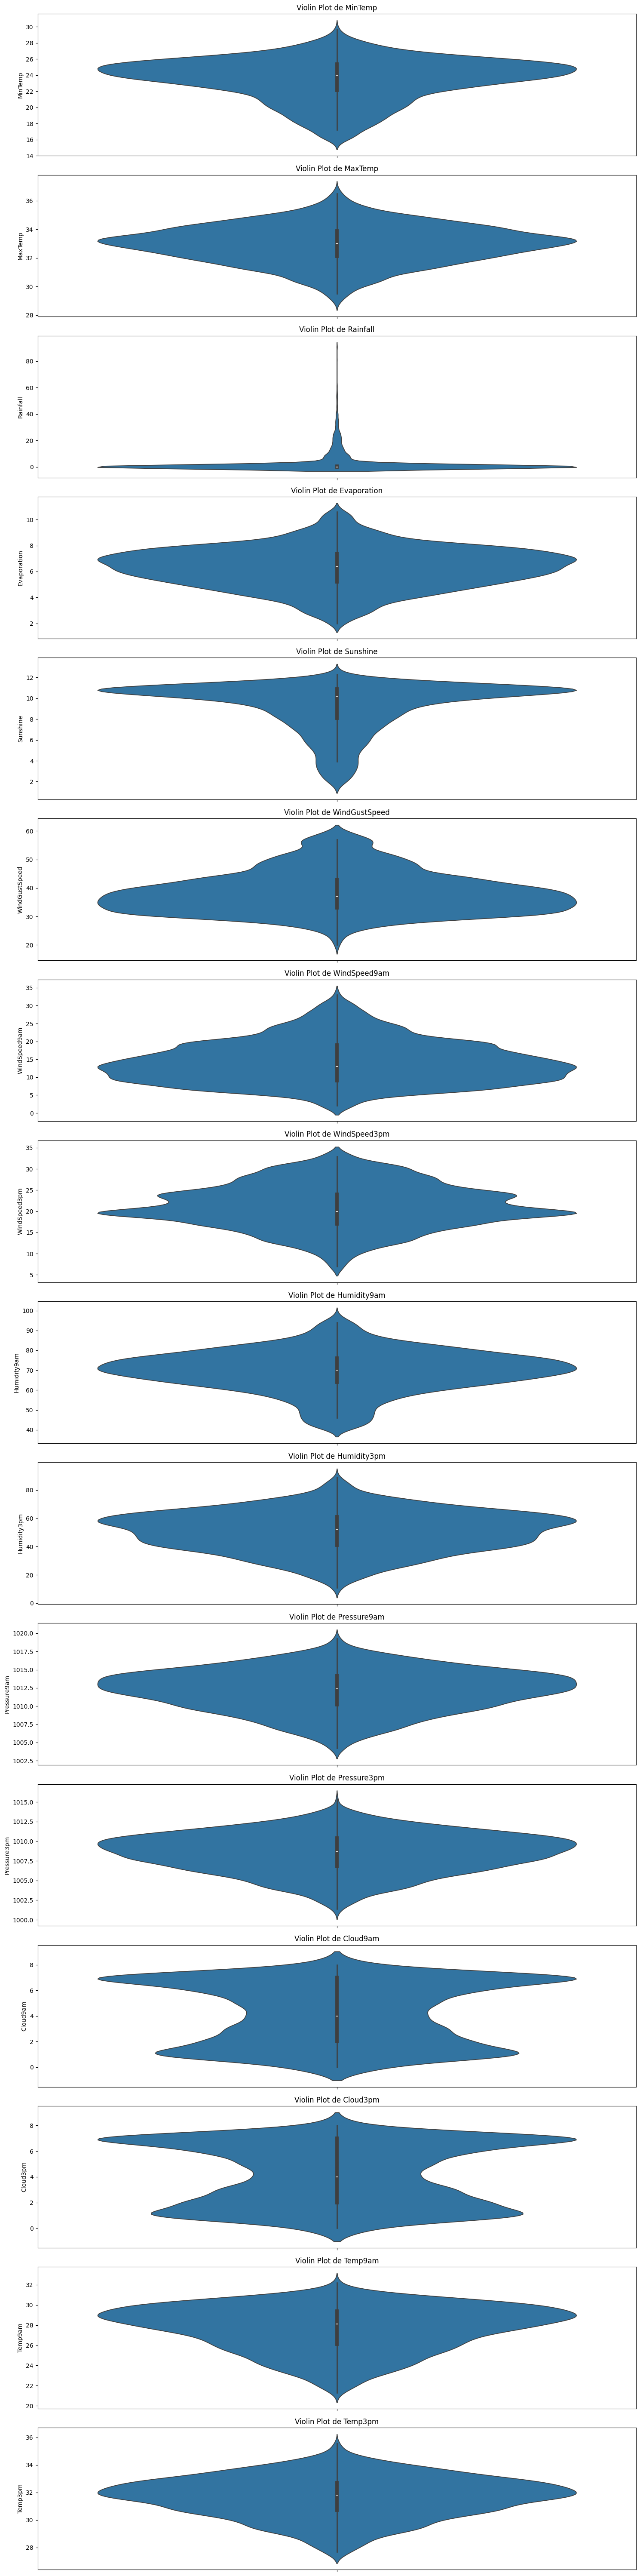

In [26]:
#Grafico de violin para las variables cuantitativas
# Lista de columnas cuantitativas
quantitative_cols = ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
                    'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm',
                    'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm',
                    'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']

# Configurar el tamaño de la gráfica
plt.figure(figsize=(15, 60))  # Ajusta el tamaño según sea necesario

# Crear un violin plot para cada columna
for i, col in enumerate(quantitative_cols, 1):
    plt.subplot(len(quantitative_cols), 1, i)  # Crea subplots para cada variable
    sns.violinplot(data=df_clean_outliers, y=col)  # Crea el violin plot
    plt.title(f'Violin Plot de {col}')  # Agrega un título al subplot

plt.tight_layout()  # Ajusta el espaciado entre subplots
plt.show()  # Muestra la gráfica

In [59]:
#La moda y el menos frecuente de las variables cualitativas
df_grouped_cualitativa = df_clean_outliers.groupby('year').agg(
    WindGustDir=('WindGustDir', pd.Series.mode),
    WindDir9am=('WindDir9am', pd.Series.mode),
    WindDir3pm=('WindDir3pm', pd.Series.mode),
    RainToday=('RainToday', pd.Series.mode),
    RainTomorrow=('RainTomorrow', pd.Series.mode)
)

# Para obtener el valor menos frecuente, podemos crear una función personalizada
def most_infrequent(s):
    value_counts = s.value_counts()
    return value_counts.index[-1]

df_grouped_less_frequent = df.groupby('year').agg(
    WindGustDir=('WindGustDir', most_infrequent),
    WindDir9am=('WindDir9am', most_infrequent),
    WindDir3pm=('WindDir3pm', most_infrequent),
    RainToday=('RainToday', most_infrequent),
    RainTomorrow=('RainTomorrow', most_infrequent)
)

print(df_grouped_cualitativa)
print(df_grouped_less_frequent)

     WindGustDir WindDir9am WindDir3pm RainToday RainTomorrow
year                                                         
2008           E        SSE        NNW        No           No
2009         WNW        ENE        WNW        No           No
2010           E          E        WNW        No           No
2011           E          E         NW        No           No
2012           N         SE        NNW        No           No
2013           E          E  [NW, WNW]        No           No
2014           E          E        NNW        No           No
2015           E          E        NNW        No           No
2016           E          E        WNW        No           No
2017           E  [ESE, SE]        WNW        No           No
     WindGustDir WindDir9am WindDir3pm RainToday RainTomorrow
year                                                         
2008         SSW         SW        SSW       Yes          Yes
2009         SSW        NNW        SSW       Yes          Yes
2010    

**Interpretación de los graficos de Violin de las variables cuantitativas**

* **Grafico de violin de temperturas (MinTemp y MaxTemp)**: Ambos gráficos de violín presentan una forma similar, con una ligera asimetría hacia la izquierda. Esto sugiere que tanto las temperaturas mínimas como las máximas tienden a concentrarse en un rango específico, con menos ocurrencias de valores extremos muy altos. Basándonos en estos gráficos, podemos inferir que Darwin tiene un clima relativamente estable, con temperaturas mínimas y máximas que varían dentro de un rango limitado. La ligera asimetría hacia la izquierda en ambos gráficos sugiere que el clima puede ser ligeramente más fresco de lo que sería si la distribución fuera perfectamente simétrica.

* **Grafico de violin de lluvia (Rainfall)**: Basándonos en este gráfico, podemos concluir que Darwin tiene un clima seco o semiárido. Las precipitaciones son escasas y, cuando ocurren, suelen ser de baja intensidad.

* **Grafico de violin de Evaporacion (Evaporation)**:Basándonos en este gráfico, podemos concluir que Darwin experimenta niveles de evaporación relativamente estables a lo largo del tiempo. No hay grandes fluctuaciones en las tasas de evaporación.

* **Grafico de violin de velocidades del viento (WindGustSpeed, WindSpeed9am, WindSpeed3pm)**: Los tres gráficos de violín presentan una forma similar, con una ligera asimetría hacia la derecha. Esto sugiere que las velocidades del viento tienden a concentrarse en un rango específico, con menos ocurrencias de vientos muy calmados. El gráfico de velocidad de ráfaga muestra un rango de valores más amplio que los de las velocidades a las 9 AM y 3 PM, lo cual es esperable, ya que las ráfagas de viento suelen ser más intensas y variables. Basándonos en estos gráficos, podemos inferir que en Darwin experimenta vientos predominantes de moderada intensidad, con ráfagas ocasionales más fuertes. Las velocidades del viento tienden a ser ligeramente más bajas a las 3 PM en comparación con las 9 AM.

* **Grafico de violin de Humedad (Humidity9am
y Humidity3pm)**: Ambos gráficos de violín presentan una forma similar, con una ligera asimetría hacia la izquierda. Esto sugiere que los niveles de humedad tienden a concentrarse en un rango específico, con menos ocurrencias de humedad extremadamente baja. Basándonos en estos gráficos, podemos inferir que en Darwin experimenta niveles de humedad relativamente estables a lo largo del día, con una ligera tendencia a una menor humedad por la tarde. La asimetría hacia la izquierda en ambos gráficos sugiere que las condiciones suelen ser más húmedas que secas.

* **Grafico de violin de Presion (Pressure9am y Pressure3pm)**:Ambos gráficos de violín presentan una forma similar, con una ligera asimetría hacia la izquierda. Esto sugiere que los niveles de presión atmosférica tienden a concentrarse en un rango específico, con menos ocurrencias de presiones extremadamente bajas. Basándonos en estos gráficos, podemos inferir que en Darwin experimenta niveles de presión atmosférica relativamente estables a lo largo del día, con una ligera tendencia a una menor presión por la tarde. La asimetría hacia la izquierda en ambos gráficos sugiere que las condiciones suelen ser de mayor presión que las de baja presión.

* **Grafico de violin de Cobertura Nubosa (Cloud9am y Cloud3pm)**: Ambos gráficos de violín presentan una forma similar, con una ligera asimetría hacia la izquierda. Esto sugiere que la cobertura nubosa tiende a concentrarse en un rango específico, con menos ocurrencias de cielos completamente despejados. Basándonos en estos gráficos, podemos inferir que el lugar donde se tomaron estos datos n Darwin experimenta niveles de cobertura nubosa relativamente estables a lo largo del día, con una ligera tendencia hacia cielos más despejados por la tarde. La asimetría hacia la izquierda en ambos gráficos sugiere que las condiciones suelen ser de cielos parcialmente nublados o nublados, más que completamente despejados.

* **Grafico de violin de temperatura (Temp9am y Temp3pm)**: Ambos gráficos de violín presentan una forma similar, con una ligera asimetría hacia la derecha. Esto sugiere que las temperaturas tienden a concentrarse en un rango específico, con menos ocurrencias de temperaturas extremadamente bajas. Basándonos en estos gráficos, podemos inferir que een Darwin experimenta un patrón típico de calentamiento diurno, con temperaturas más altas por la tarde que por la mañana. La asimetría hacia la derecha en ambos gráficos sugiere que las condiciones suelen ser más cálidas que frías.







**Analisis de las variables cualitativas**

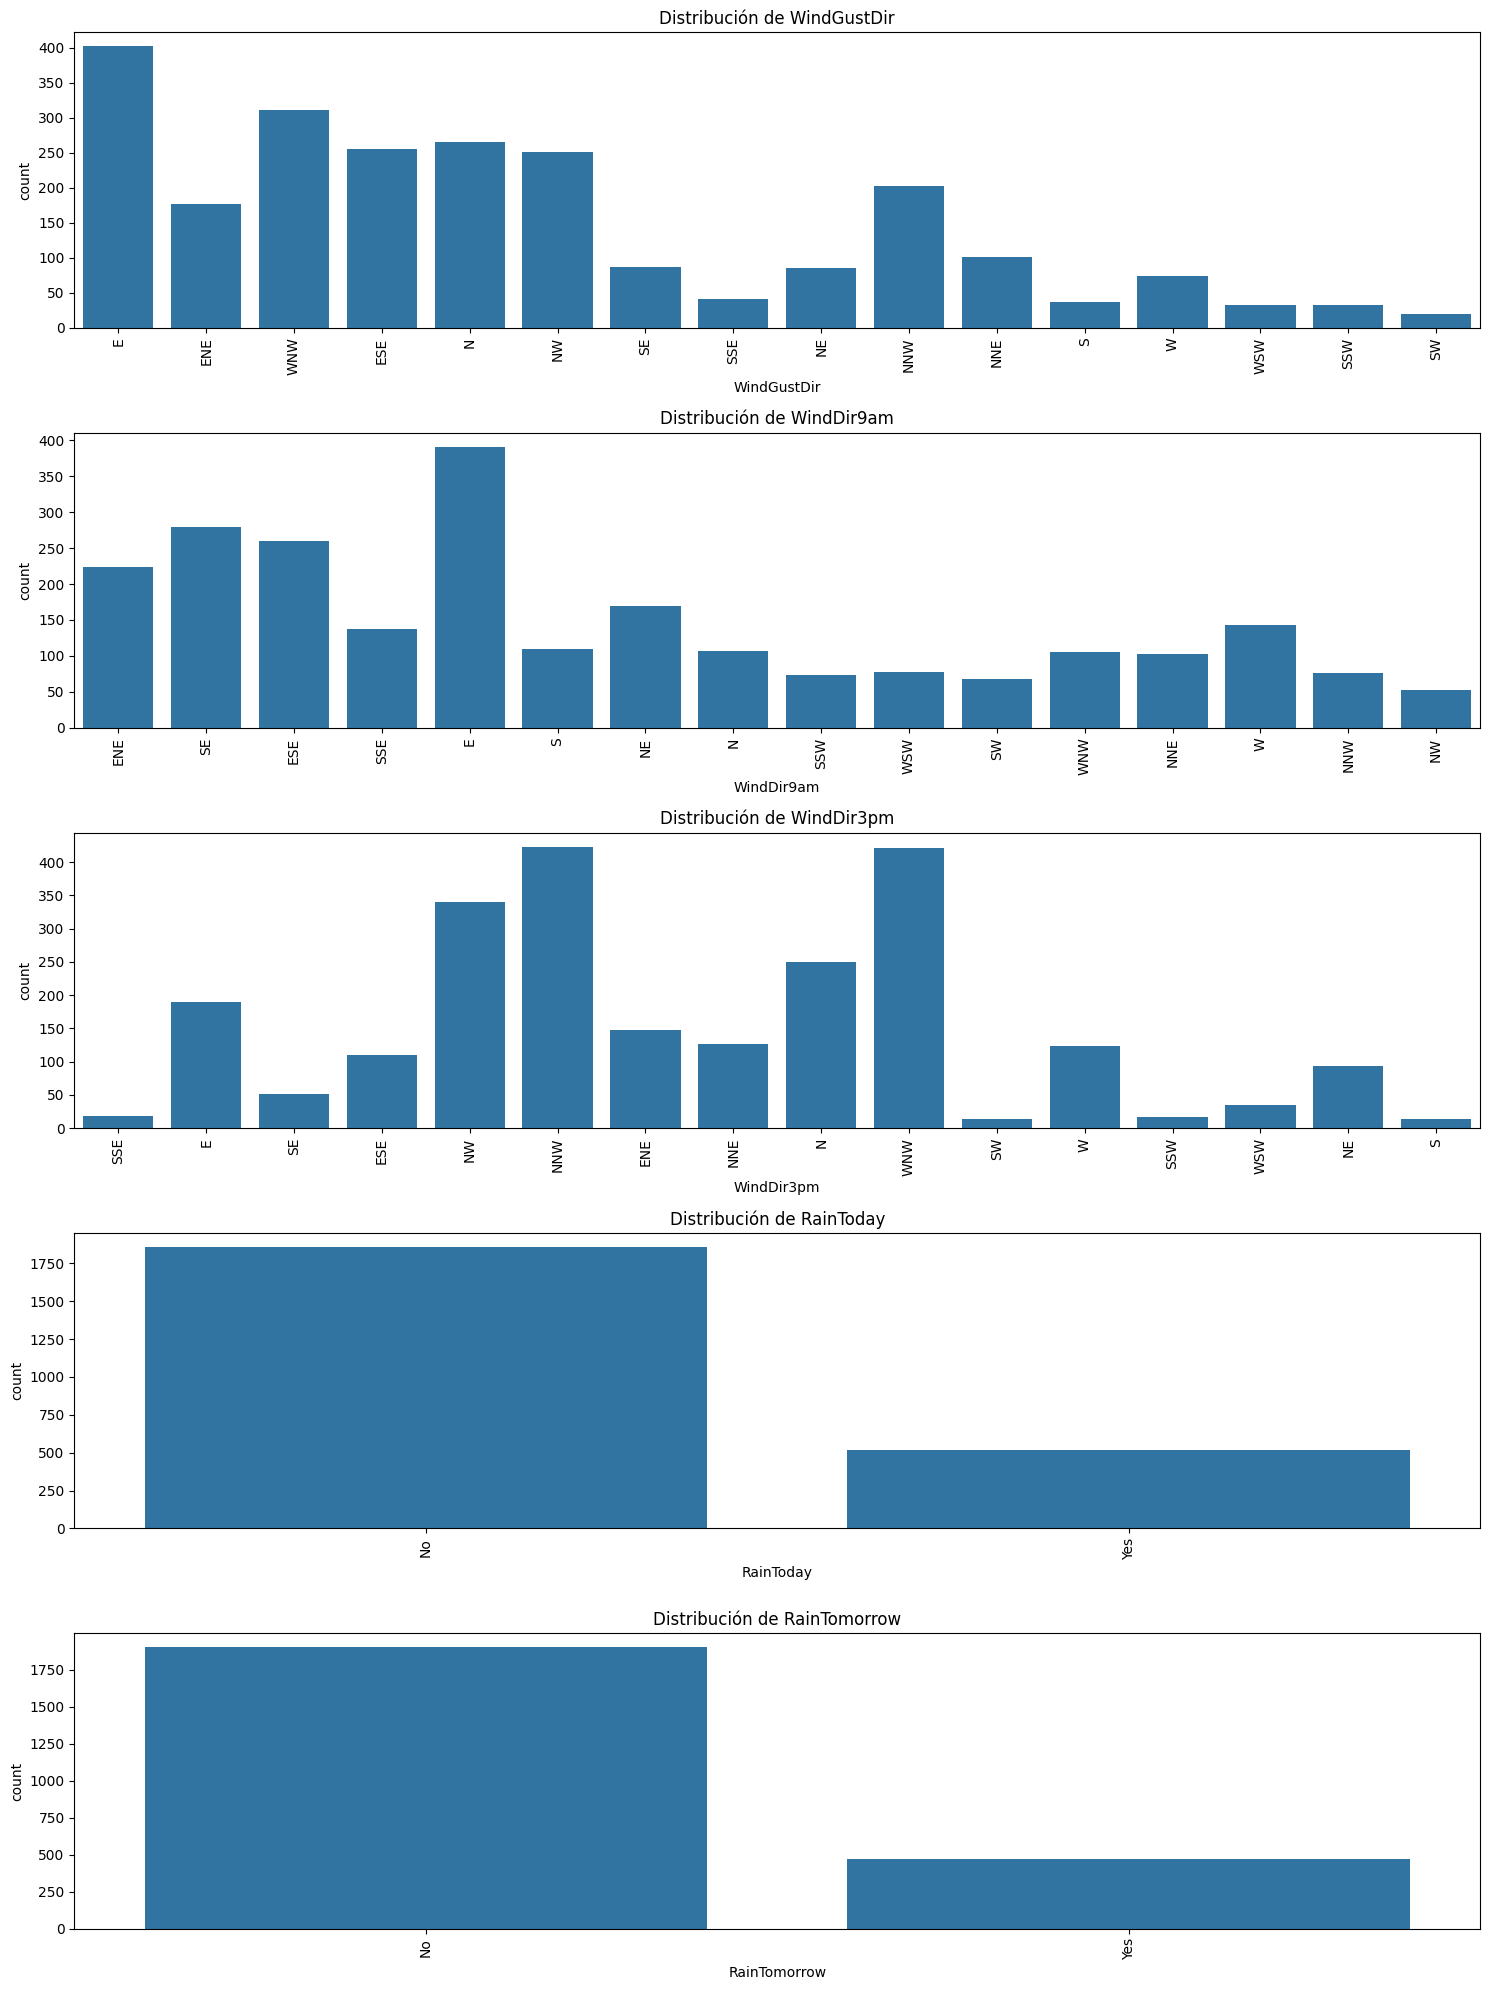

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# Variables categóricas
categoricas = [ 'WindGustDir', 'WindDir9am', 'WindDir3pm',  'RainToday', 'RainTomorrow']

# Crear gráficos de barras para cada variable categórica
plt.figure(figsize=(15, 20))
for i, col in enumerate(categoricas, 1):
    plt.subplot(len(categoricas), 1, i)
    sns.countplot(data=df_clean_outliers, x=col)
    plt.title(f'Distribución de {col}')
    plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

**Explicacion de los graficos** **texto en negrita**

* **Distribucion de direccion del viento (WindGustDir)**: La dirección desde la que sopla el viento con mayor frecuencia es el este (E). Esto significa que la mayoría de las veces, el viento viene desde el este hacia el oeste en Darwin.Le siguen en frecuencia las direcciones este-noreste (ENE) y este-sudeste (ESE). Esto indica una tendencia general del viento a soplar desde el sector este. Las direcciones con menor frecuencia son el suroeste (SW) y sur-suroeste (SSW). Esto sugiere que el viento sopla con menos intensidad desde estas direcciones.

* **Distribucion de direccion del viento 9am y 3pm (WindDir9am y WindDir3pm)**: Para las 9am y 3pm el viento sopla con mayor frecuencia desde la dirección este (E), en cambio para las 9am las otras direcciones frecuentes son este-noreste (ENE) y este-sudeste (ESE), lo que indica una tendencia general del viento a venir del sector este por la mañana y por la tarde 3pm las direcciones este-noreste (ENE) y noroeste (NW) también son comunes a esta hora. Las direcciones menos frecuentes a las 9am y 3pm  son los vientos del suroeste (SW) y sur-suroeste (SSW).

* **Distribucion de RainToday**: Este grafico nos indica que casi no llueve en Darwin.
* **Distribucion de RainTomorrow**: Al igual que el grafico de RainToday nos muestra que casi no llueve en Darwin.

# **Análisis bivariado**

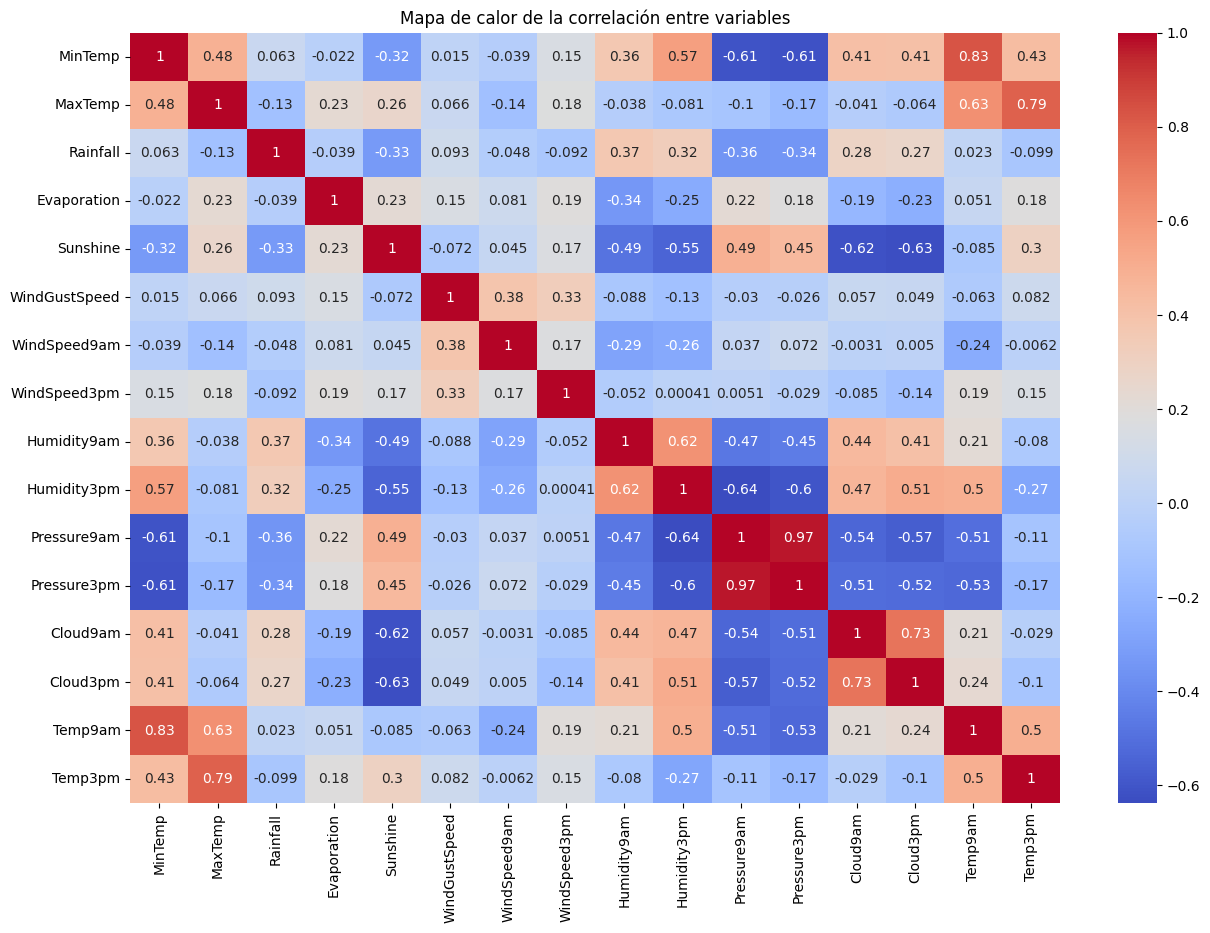

In [28]:
#Verificamos si existen correlacciones en las variable cuantitativas
numeric_df = df_clean_outliers[quantitative].select_dtypes(include=[np.number])

# Gráfico: Heatmap de la correlación entre variables (Seaborn)
plt.figure(figsize=(15, 10))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Mapa de calor de la correlación entre variables')
plt.show()

El mapa de calor de correlación nos permite entender como se relacionan las diferentes variables climatologicas de Darwin, para lo cual vamos a tener en cuenta la correlación entre dos variables:
* **Valores cercanos a 1**: Indican una correlación positiva fuerte, es decir, cuando una variable aumenta, la otra también tiende a aumentar.
* **Valores cercanos a -1**: Indican una correlación negativa fuerte, es decir, cuando una variable aumenta, la otra tiende a disminuir.
* **Valores cercanos a 0**: Indican una correlación débil o nula, es decir, no hay una relación lineal clara entre las variables.

Al interpretar los datos obtenidos en el mapa de calor de Darwin podemos observar lo siguiente:

**Relaciones positivas fuertes**:

* **Temperatura máxima vs mínima**: Existe una fuerte correlación positiva entre la temperatura máxima y mínima, lo que es lógico ya que días cálidos suelen tener noches cálidas también.
* **Humedad relativa vs temperatura**: Existe una fuerte correlación negativa entre la humedad relativa y la temperatura. Esto es común, ya que a mayor temperatura, menor humedad relativa.
* **Presión atmosférica vs temperatura**: Existe una fuerte correlación negativa entre la presión atmosférica y la temperatura. Generalmente, sistemas de baja presión están asociados con temperaturas más altas y sistemas de alta presión con temperaturas más bajas.
* **Nubosidad vs humedad relativa**: Existe una fuerte correlación positiva entre la nubosidad y la humedad relativa. Las nubes suelen formarse cuando el aire se satura de humedad.

**Otras relaciones**:
* **Radiación solar vs temperatura maxima y humedad relativa**: La radiación solar tiene una correlación positiva con la temperatura máxima y negativa con la humedad relativa, lo que es intuitivo.
* **Velocidad del viento**: El viento tiene relaciones más débiles con otras variables, pero en general, vientos fuertes pueden estar asociados con cambios en la temperatura y la humedad.

# **Dispersion de las relaciones**


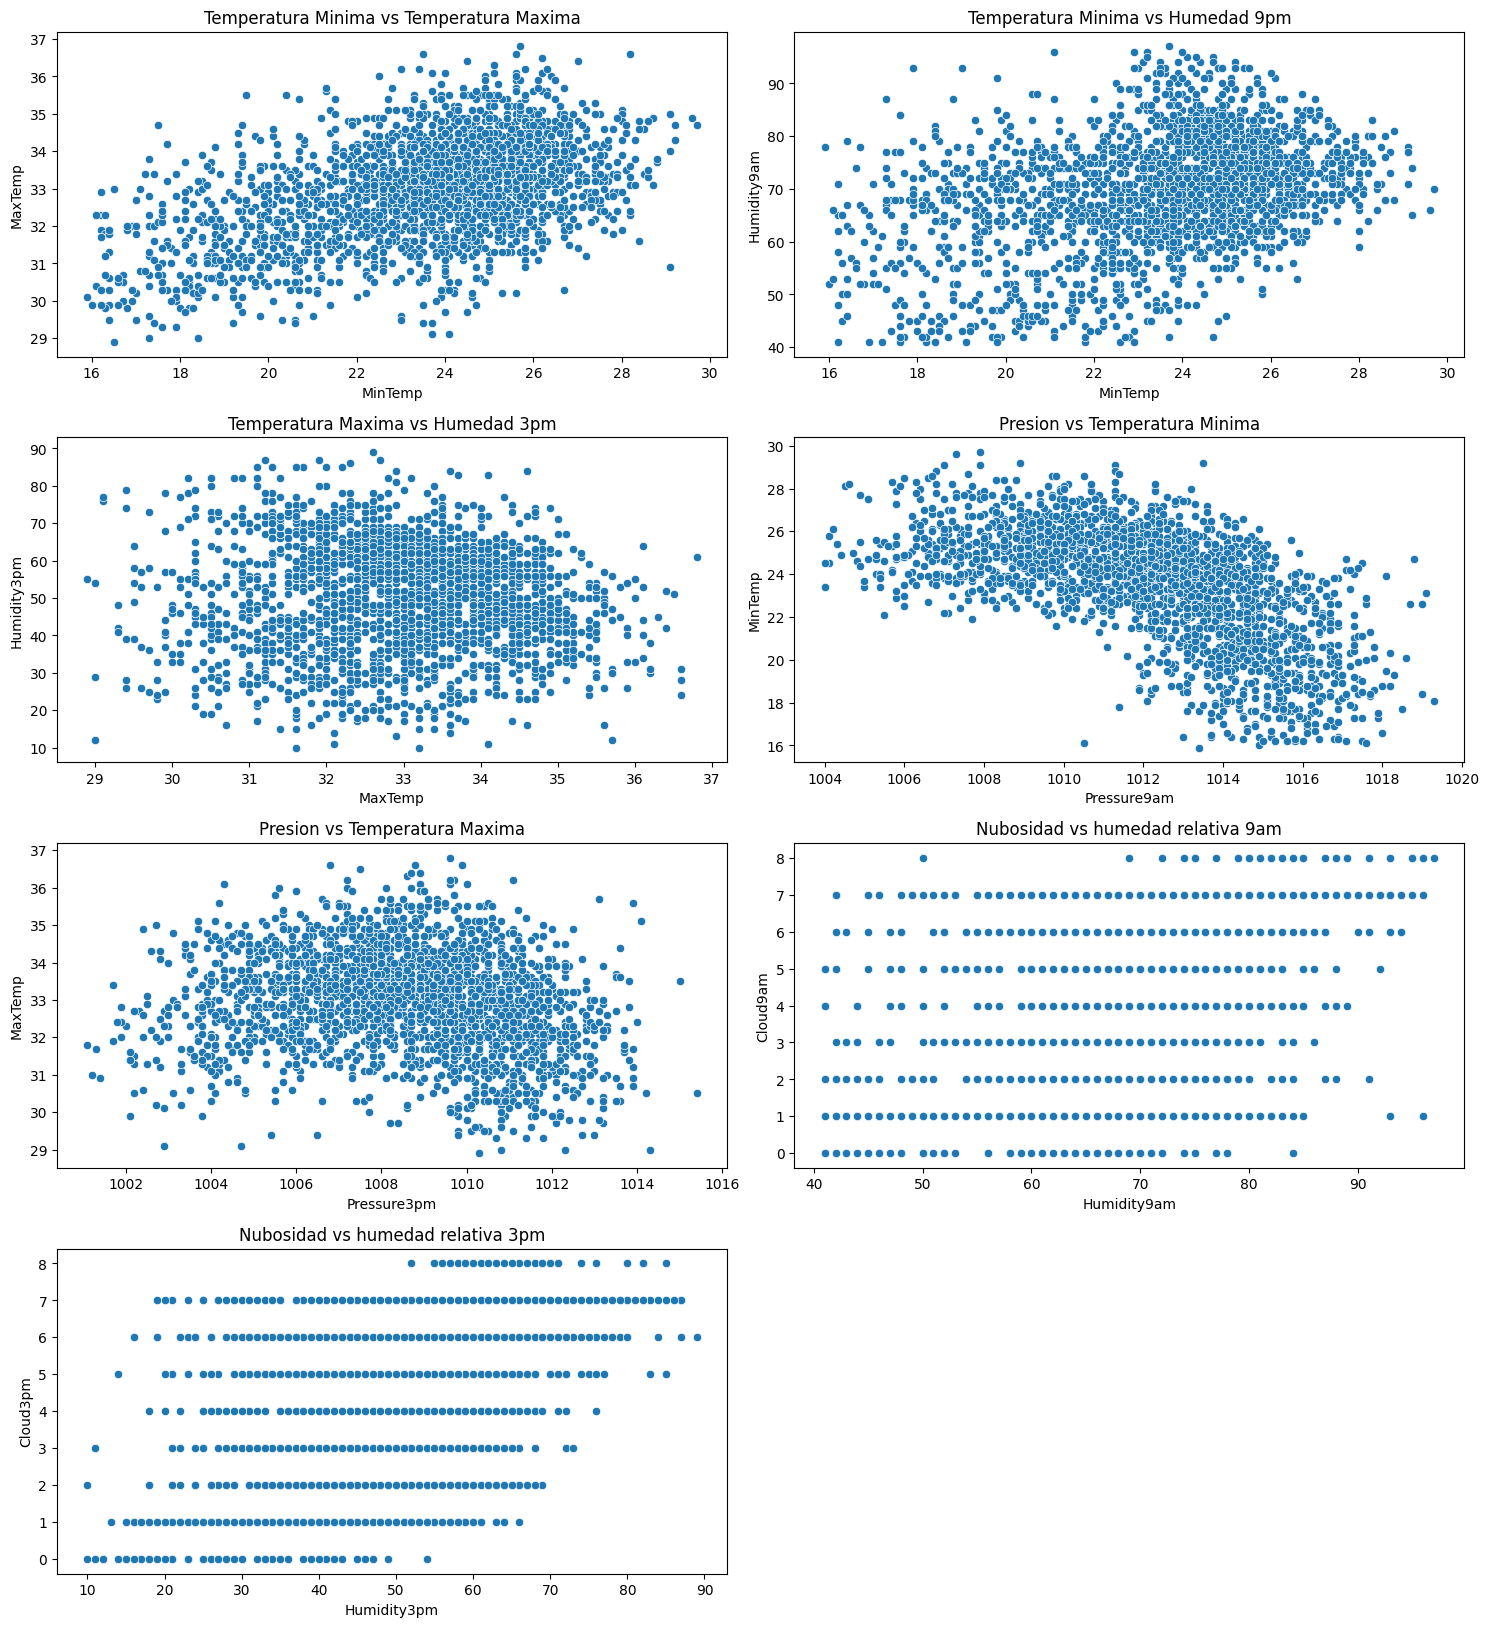

In [30]:
# Configuración del tamaño del gráfico general
plt.figure(figsize=(15, 20))

# 1. MinTemp vs MaxTemp
plt.subplot(5, 2, 1)
sns.scatterplot(data=df_clean_outliers, x='MinTemp', y='MaxTemp')
plt.title('Temperatura Minima vs Temperatura Maxima')

# 2. MinTemp y MaxTemp vs Humidity9am y Humidity3pm
plt.subplot(5, 2, 2)
sns.scatterplot(data=df_clean_outliers, x='MinTemp', y='Humidity9am')
plt.title('Temperatura Minima vs Humedad 9pm')

plt.subplot(5, 2, 3)
sns.scatterplot(data=df_clean_outliers, x='MaxTemp', y='Humidity3pm')
plt.title('Temperatura Maxima vs Humedad 3pm')

# 3. Presión atmosférica vs temperatura
plt.subplot(5, 2, 4)
sns.scatterplot(data=df_clean_outliers, x='Pressure9am', y='MinTemp')
plt.title('Presion vs Temperatura Minima')

plt.subplot(5, 2, 5)
sns.scatterplot(data=df_clean_outliers, x='Pressure3pm', y='MaxTemp')
plt.title('Presion vs Temperatura Maxima')

# 4. Nubosidad vs humedad relativa
plt.subplot(5, 2, 6)
sns.scatterplot(data=df_clean_outliers, x='Humidity9am', y='Cloud9am')
plt.title('Nubosidad vs humedad relativa 9am')

plt.subplot(5, 2, 7)
sns.scatterplot(data=df_clean_outliers, x='Humidity3pm', y='Cloud3pm')
plt.title('Nubosidad vs humedad relativa 3pm')


plt.tight_layout()
plt.show()


De acuerdo con el mapa de calor se realizo los graficos de dispersion de las relaciones que para observar a mas detalle:

* **Temperatura Mínima vs. Temperatura Máxima**: Existe una fuerte correlación positiva entre la temperatura mínima y máxima. Esto significa que cuando la temperatura mínima es alta, la temperatura máxima también tiende a ser alta. Es lógico, ya que los días más cálidos suelen tener noches más cálidas. Este gráfico sugiere que existe una relación directa entre las temperaturas mínimas y máximas, lo cual es típico de los patrones climáticos.

* **Temperatura Mínima vs. Humedad a las 9 AM**: Se observa una tendencia ligeramente negativa, lo que indica que a medida que aumenta la temperatura mínima, la humedad tiende a disminuir. Esto es coherente con el principio de que el aire caliente puede retener más humedad. Sin embargo, la relación no es tan fuerte como en el primer gráfico. Hay una mayor dispersión de los puntos, lo que sugiere que otros factores también influyen en la humedad además de la temperatura.

* **Temperatura Máxima vs. Humedad a las 3 PM**: Similar al gráfico 2, se observa una tendencia negativa, pero en este caso la relación parece ser un poco más fuerte. Esto confirma la relación inversa entre temperatura y humedad, especialmente en las horas más cálidas del día.

* **Presión vs. Temperatura Mínima**: La relación entre la presión y la temperatura mínima no es tan clara como en los otros gráficos. Los puntos están más dispersos, lo que sugiere una relación más débil o incluso nula. Esto podría indicar que otros factores, además de la presión, influyen en la temperatura mínima, o que la relación entre estas dos variables es más compleja y no se captura completamente por este gráfico.

* **Presión vs. Temperatura Máxima**: A pesar de que el mapa de relaciones mostros que habia cierta relacion, no se observa una correlación clara entre la presión atmosférica y la temperatura máxima. Los puntos están dispersos de manera aleatoria, lo que sugiere que no existe una relación lineal directa entre estas dos variables.Esto indica que, en el contexto de los datos analizados, los cambios en la presión atmosférica no están fuertemente asociados con cambios en la temperatura máxima.

* **Nubosidad vs. Humedad Relativa a las 9 AM**: Se observa una ligera tendencia positiva, lo que sugiere que a mayor humedad relativa a las 9 AM, hay una mayor probabilidad de que haya más nubes. Esto es coherente con el proceso de formación de nubes. El aire cálido y húmedo tiende a elevarse, enfriarse y condensarse formando nubes. Sin embargo, la relación no es muy fuerte, lo que indica que otros factores también influyen en la formación de nubes.

* **Nubosidad vs. Humedad Relativa a las 3 PM**: Al igual que en el gráfico anterior, se observa una ligera tendencia positiva, aunque menos marcada. Esto sugiere que la relación entre la nubosidad y la humedad relativa se mantiene a lo largo del día, aunque podría ser menos pronunciada a las 3 PM. La menor pendiente de esta relación podría indicar que otros procesos, como la evaporación durante el día, están influyendo en la humedad relativa y la formación de nubes a las 3 PM.



# **Serie temporal de precipitación total anual**

<ipython-input-30-3fd2f8a2f619>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=annual_rainfall.index, y=annual_rainfall.values, palette="Blues_d")


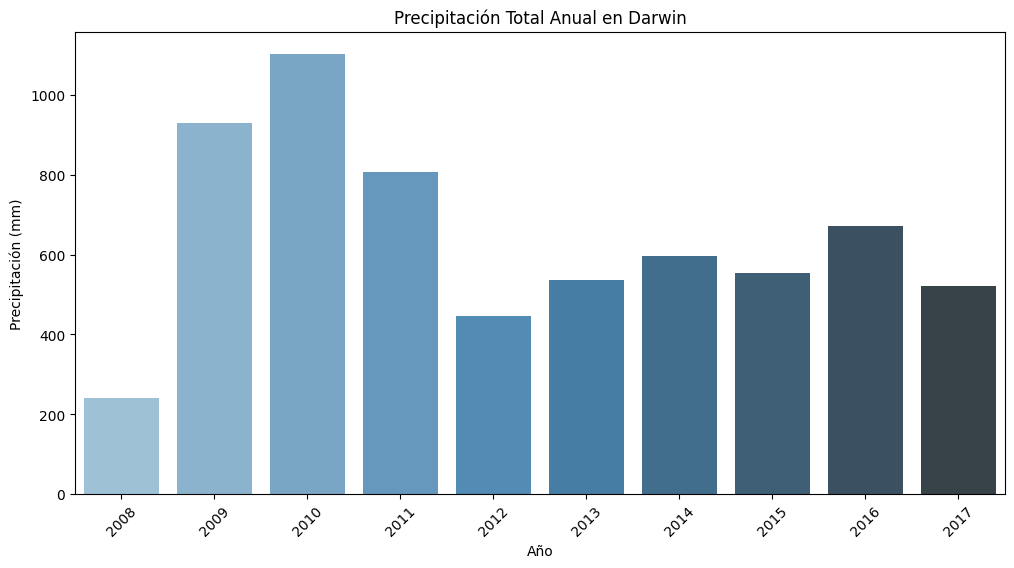

In [30]:
annual_rainfall = df_clean_outliers.groupby('year')['Rainfall'].sum()

plt.figure(figsize=(12, 6))
sns.barplot(x=annual_rainfall.index, y=annual_rainfall.values, palette="Blues_d")
plt.title("Precipitación Total Anual en Darwin")
plt.xlabel("Año")
plt.ylabel("Precipitación (mm)")
plt.xticks(rotation=45)
plt.show()

El gráfico muestra la variación de la precipitación total cada año entre 2008 y 2017 en un lugar determinado (Darwin). Analizando este gráfico, podemos observar lo siguiente:

* *Fluctuaciones significativas*: La cantidad de precipitaciones varía considerablemente de un año a otro. Hay años con precipitaciones abundantes (por ejemplo, 2010) y años más secos (por ejemplo, 2012).
* *Tendencia general*: Aunque hay fluctuaciones significativas, no hay una tendencia clara al alza o a la baja en las precipitaciones durante el periodo analizado.
* *Años con precipitación máxima*: Destaca el año 2010 con la mayor cantidad de precipitación, lo que sugiere un posible evento de precipitación extrema en ese año.
* *Años con precipitación mínima*: El año 2012 parece ser el más seco del periodo analizado.

# **Histograma de precipitación máxima diaria**

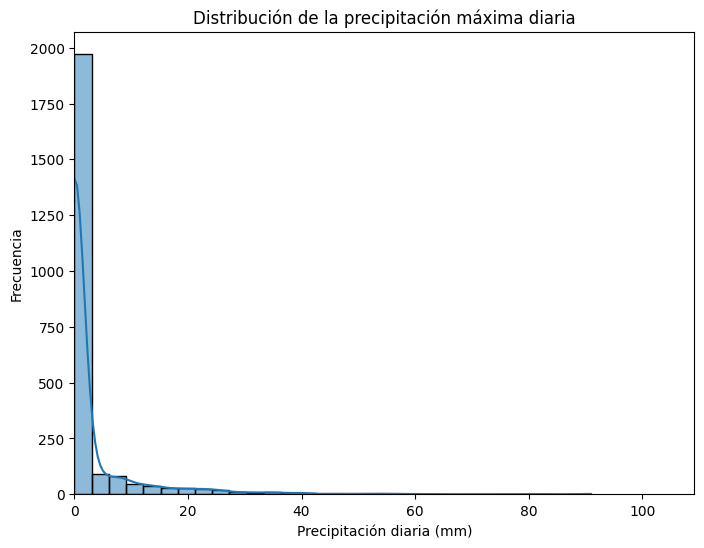

In [31]:
# Identificar la precipitación máxima diaria
max_precip_dia = df_clean_outliers['Rainfall'].max()

# Crear el histograma
plt.figure(figsize=(8, 6))
sns.histplot(data=df_clean_outliers, x='Rainfall', bins=30, kde=True)
plt.xlabel('Precipitación diaria (mm)')
plt.ylabel('Frecuencia')
plt.title('Distribución de la precipitación máxima diaria')
plt.xlim(0, max_precip_dia * 1.2)  # Ajustar los límites del eje x
plt.show()

El histograma nos muestra cómo se distribuyen los valores de la precipitación máxima diaria a lo largo de un período determinado. Cada barra representa un rango de valores de precipitación y la altura de la barra indica la frecuencia con la que se ha observado ese rango de valores.

A partir de este histograma, podemos observar lo siguiente:

* *Asimetría positiva*: La distribución es claramente asimétrica hacia la derecha. Esto significa que la mayoría de los días tienen una precipitación máxima diaria baja o moderada, pero hay algunos días con precipitaciones extremadamente altas.
* *Valores máximos*: El histograma muestra que se han registrado días con precipitaciones máximas superiores a 100 mm. Estos eventos de alta precipitación pueden estar asociados a fenómenos meteorológicos extremos como tormentas o huracanes.
* *Concentración de valores bajos*: La mayor parte de los datos se concentran en la parte izquierda del histograma, lo que indica que la mayoría de los días tienen precipitaciones bajas o moderadas.
* *Cola larga*: La presencia de una cola larga hacia la derecha indica que hay una probabilidad no despreciable de que ocurran eventos de precipitación extremadamente alta.

# **Diagrama de dispersión entre precipitación y temperatura**

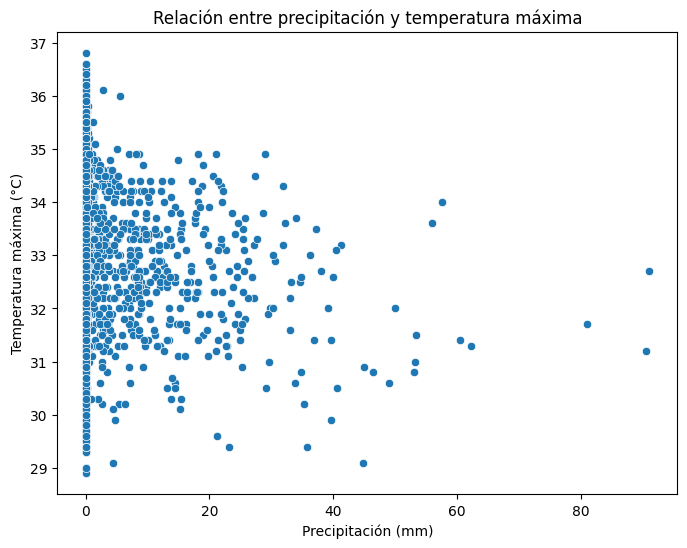

In [32]:
# Crear el diagrama de dispersión
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_clean_outliers, x='Rainfall', y='MaxTemp')
plt.xlabel('Precipitación (mm)')
plt.ylabel('Temperatura máxima (°C)')
plt.title('Relación entre precipitación y temperatura máxima')
plt.show()

Un diagrama de dispersión nos permite visualizar la relación entre dos la precipitación (en mm) y la temperatura máxima (en °C). Cada punto en el gráfico representa un día específico con sus valores correspondientes de precipitación y temperatura máxima.
* *No hay una tendencia definida*: Los puntos se distribuyen de manera bastante aleatoria en el gráfico, sin mostrar una clara tendencia ascendente o descendente. Esto sugiere que no existe una relación lineal directa entre la precipitación y la temperatura máxima en los datos analizados.
* *Variabilidad*: La dispersión de los puntos indica una gran variabilidad en las condiciones climáticas. Incluso en días con alta precipitación, se pueden observar temperaturas máximas muy diferentes, y viceversa.

# **Gráfico de barras de la precipitación promedio en diferentes meses del año**

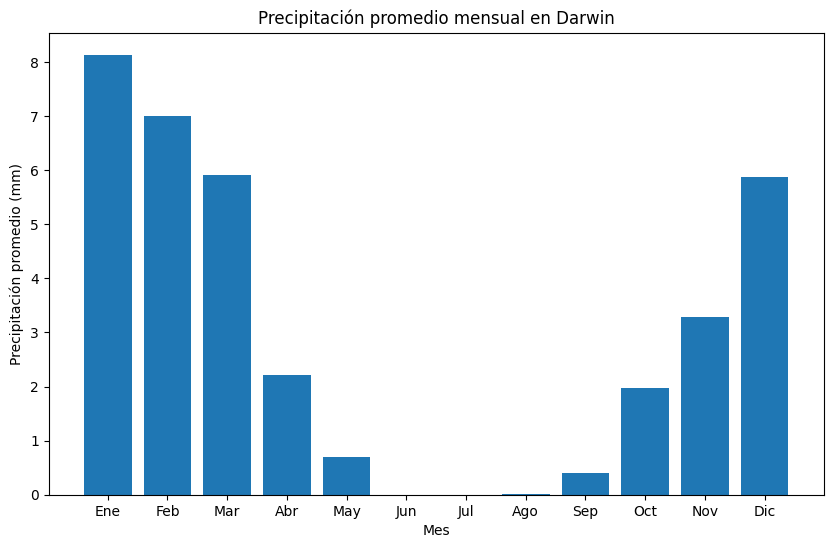

In [34]:
# Agrupar por mes y calcular la precipitación promedio
precip_mensual = df_clean_outliers.groupby(df['Date'].dt.month)['Rainfall'].mean()

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(precip_mensual.index, precip_mensual.values)
plt.xlabel('Mes')
plt.ylabel('Precipitación promedio (mm)')
plt.title('Precipitación promedio mensual en Darwin')
# Provide a full list of month labels
plt.xticks(ticks=range(1, 13), labels=['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic'])
plt.show()

El gráfico muestra la cantidad promedio de lluvia que cae en Darwin cada mes del año. Cada barra representa un mes, y la altura de la barra indica la cantidad promedio de precipitación en milímetros.

* *Estacionalidad marcada*: Es evidente un patrón estacional muy definido. Hay meses con precipitaciones significativamente más altas que otros.
* *Época lluviosa*: Los meses de enero a abril presentan las mayores cantidades de precipitación, lo que sugiere una época lluviosa bien definida en estos meses.
* *Época seca*: Por otro lado, los meses de junio a septiembre muestran las menores cantidades de precipitación, indicando una época seca prolongada.
* *Transición gradual*: La transición entre la estación lluviosa y la seca parece ser gradual, con un aumento gradual de las precipitaciones a partir de septiembre y una disminución gradual a partir de abril.

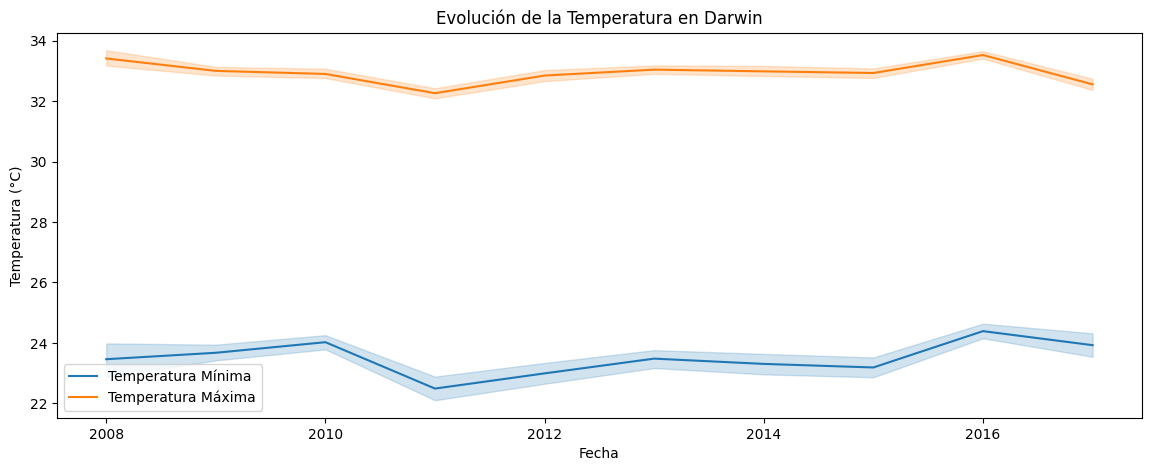

In [39]:
plt.figure(figsize=(14, 5))
sns.lineplot(data=df_clean_outliers, x='year', y='MinTemp', label='Temperatura Mínima')
sns.lineplot(data=df_clean_outliers, x='year', y='MaxTemp', label='Temperatura Máxima')
plt.title("Evolución de la Temperatura en Darwin")
plt.xlabel("Fecha")
plt.ylabel("Temperatura (°C)")
plt.legend()
plt.show()


Las temperturas máximas representadas con la linea naranja son mas estables que las temperturas minimas representadas con la linea azul, lo cual nos indica que Darwin se mantiene una temperatura relativamente constantes durante el 2008-2017.

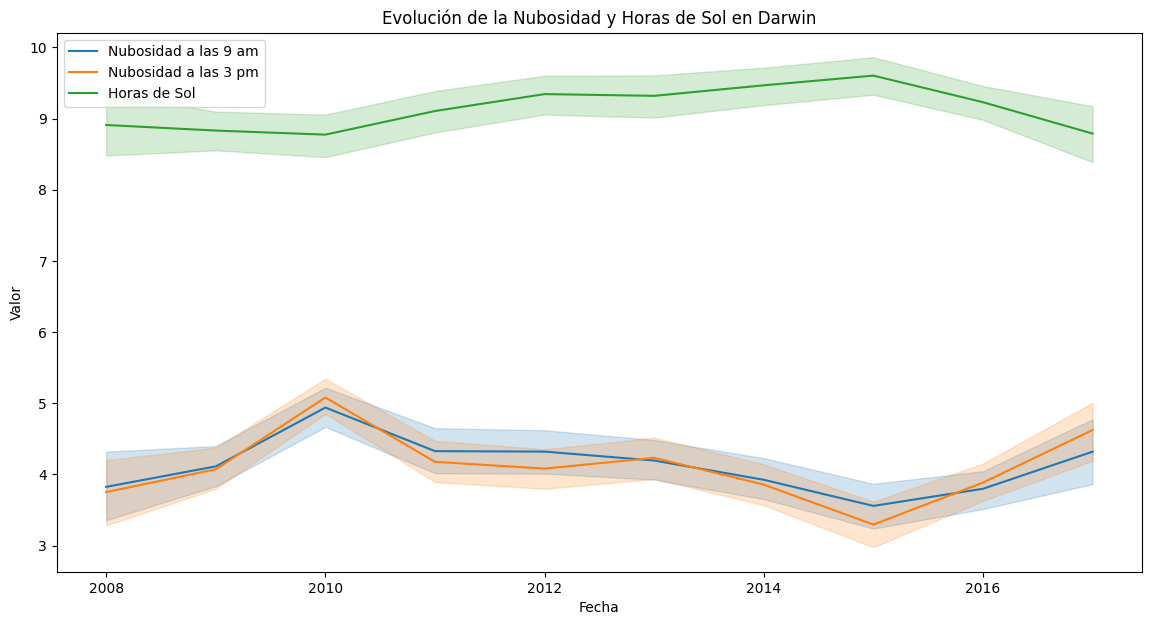

In [40]:
plt.figure(figsize=(14, 7))
sns.lineplot(data=df_clean_outliers, x='year', y='Cloud9am', label='Nubosidad a las 9 am')
sns.lineplot(data=df_clean_outliers, x='year', y='Cloud3pm', label='Nubosidad a las 3 pm')
sns.lineplot(data=df_clean_outliers, x='year', y='Sunshine', label='Horas de Sol')
plt.title("Evolución de la Nubosidad y Horas de Sol en Darwin")
plt.xlabel("Fecha")
plt.ylabel("Valor")
plt.legend()
plt.show()

La Nubosidad, tanto la nubosidad a las 9 AM como a las 3 PM muestran una cierta variabilidad a lo largo de los años, sin una tendencia clara de aumento o disminución. Sin embargo, se observa que la nubosidad tiende a ser mayor en los primeros años del período 2008-2017 y disminuye ligeramente hacia el final.
En cuanto a las Horas de sol, la línea de las horas de sol muestra una tendencia ligeramente ascendente, lo que sugiere que podría haber un aumento gradual en la duración del sol a lo largo de los años.

Adicionalmente podemos decir que existe una relación inversa entre la nubosidad y las horas de sol, lo que es lógico. A mayor nubosidad, menor cantidad de horas de sol. Tambien podemos observar una variabilidad diurna, ya que existe una diferencia entre la nubosidad a las 9 AM y a las 3 PM sugiere que la cobertura de nubes puede variar significativamente a lo largo del día.

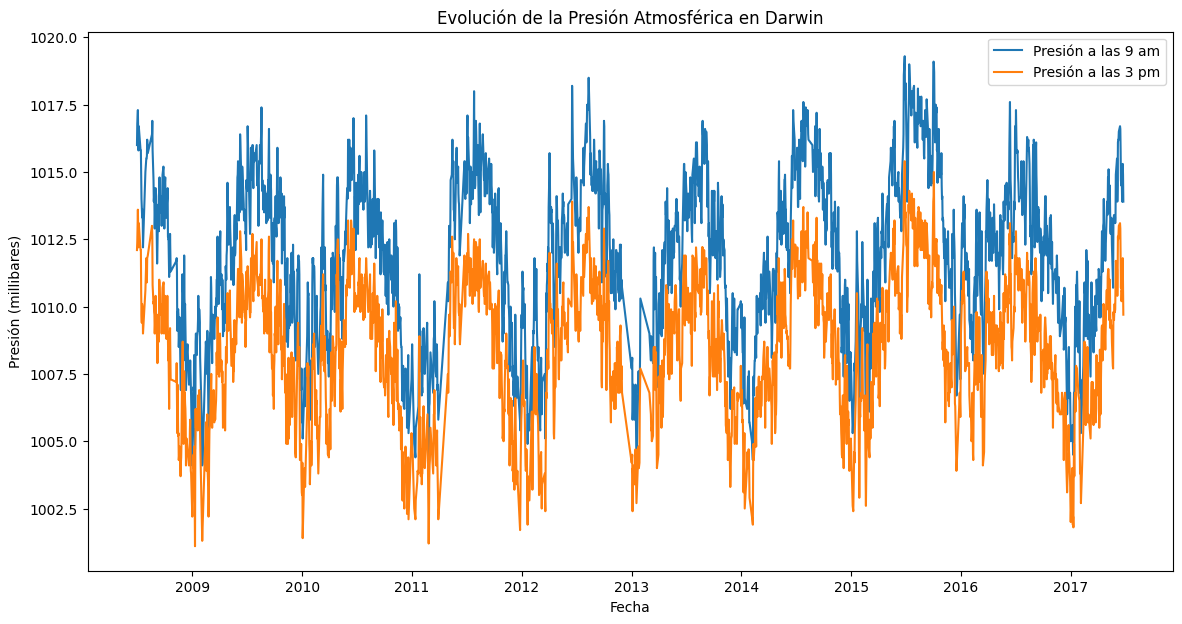

In [42]:
plt.figure(figsize=(14, 7))
sns.lineplot(data=df_clean_outliers, x='Date', y='Pressure9am', label='Presión a las 9 am')
sns.lineplot(data=df_clean_outliers, x='Date', y='Pressure3pm', label='Presión a las 3 pm')
plt.title("Evolución de la Presión Atmosférica en Darwin")
plt.xlabel("Fecha")
plt.ylabel("Presión (millibares)")
plt.legend()
plt.show()

El gráfico presenta la evolución de la presión atmosférica en Darwin a lo largo de 2008 al 2017, específicamente a las 9 AM y a las 3 PM. La presión atmosférica se mide en milibares y representa el peso de la atmósfera sobre un punto determinado de la superficie terrestre.

Se observa un patrón cíclico diario en la presión atmosférica. Generalmente, la presión suele ser ligeramente más alta en las horas de la mañana (9 AM) y más baja en las horas de la tarde (3 PM). Este patrón es típico y se debe a los cambios en la temperatura y la humedad a lo largo del día, que afectan la densidad del aire.

**Analisis de variables climatologicas en el tiempo**

In [57]:
#Maximos y Minimos de las varibles cuantitativas a traves de cada año
#Rainfall_year = df_clean_outliers.groupby('year')['Rainfall'].agg([max,min])
df_grouped_cuantitativa = df_clean_outliers.groupby('year').agg({'MinTemp': ['min', 'max'],
                                    'MaxTemp': ['min', 'max'],
                                    'Rainfall': ['min', 'max'],
                                    'Evaporation': ['min', 'max'],
                                    'Sunshine': ['min', 'max'],
                                    'WindGustSpeed': ['min', 'max'],
                                    'WindSpeed9am': ['min', 'max'],
                                    'WindSpeed3pm': ['min', 'max'],
                                    'Humidity9am': ['min', 'max'],
                                    'Humidity3pm': ['min', 'max'],
                                    'Pressure9am': ['min', 'max'],
                                    'Pressure3pm': ['min', 'max'],
                                    'Cloud9am': ['min', 'max'],
                                    'Cloud3pm': ['min', 'max'],
                                    'Temp9am': ['min', 'max'],
                                    'Temp3pm': ['min', 'max']
                                   })
df_grouped_cuantitativa

#['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday','RainTomorrow']

MinTemp       MaxTemp       Rainfall       Evaporation       Sunshine  \
         min   max     min   max      min   max         min   max      min   
year                                                                         
2008    16.2  29.6    29.1  36.8      0.0  44.8         3.0  10.4      2.0   
2009    16.2  28.5    29.4  36.4      0.0  90.4         2.0  10.2      1.9   
2010    17.9  28.4    29.0  36.5      0.0  62.2         2.0  10.6      1.9   
2011    16.0  28.6    29.3  35.8      0.0  60.4         2.2   9.6      2.0   
2012    15.9  27.9    29.0  36.6      0.0  91.0         2.4  10.6      2.1   
2013    16.2  29.1    29.5  36.6      0.0  32.2         2.2  10.2      1.9   
2014    16.1  29.7    28.9  36.1      0.0  49.0         2.0  10.6      1.9   
2015    16.1  29.1    29.0  36.6      0.0  46.4         2.4  10.6      2.0   
2016    16.6  29.2    30.0  36.2      0.0  40.4         2.2  10.4      2.2   
2017    16.9  28.2    29.4  34.7      0.0  34.8         2.0  10.6      2.2   

            ... Pressure3pm         Cloud9am      Cloud3pm      Temp9am        \
       max  ...         min     max      min  max      min  max     min   max   
year        ...                                                                 
2008  11.9  ...      1003.7  1013.6      0.0  8.0      0.0  7.0    21.3  32.1   
2009  11.8  ...      1001.1  1012.8      0.0  8.0      0.0  8.0    22.0  32.0   
2010  12.3  ...      1001.4  1013.2      0.0  8.0      0.0  8.0    21.9  31.3   
2011  12.0  ...      1001.2  1012.7      0.0  8.0      0.0  8.0    21.3  31.8   
2012  12.1  ...      1001.9  1013.9      0.0  8.0      0.0  8.0    21.6  31.4   
2013  12.0  ...      1002.4  1012.2      0.0  8.0      0.0  8.0    22.6  31.3   
2014  12.2  ...      1001.9  1013.7      0.0  8.0      0.0  8.0    21.4  32.2   
2015  12.0  ...      1002.4  1015.4      0.0  8.0      0.0  8.0    22.0  31.8   
2016  12.1  ...      1002.0  1013.1      0.0  8.0      0.0  8.0    23.0  31.7   
2017  11.8  ...      1001.8  1013.1      0.0  8.0      0.0  8.0    21.6  30.8   

     Temp3pm        
         min   max  
year                
2008    28.3  34.7  
2009    27.5  34.9  
2010    27.5  35.3  
2011    27.6  34.7  
2012    28.1  35.1  
2013    27.6  35.6  
2014    27.5  34.4  
2015    27.9  35.4  
2016    27.9  35.4  
2017    27.5  34.0  

[10 rows x 32 columns]

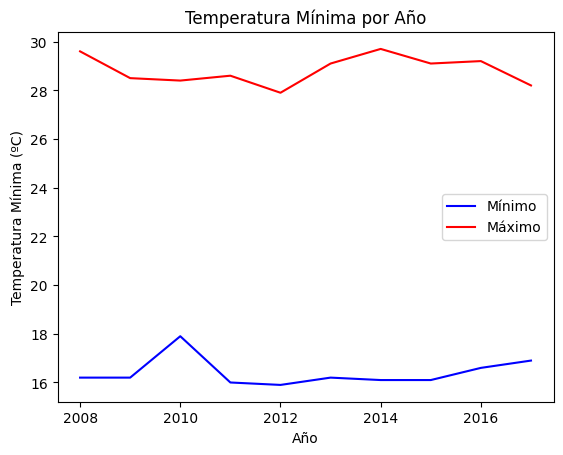

In [60]:
# Gráfico de la temperatura mínima
df_grouped_cuantitativa['MinTemp'].plot(kind='line', color=['blue', 'red']) # Accessing the multi-index column
plt.title('Temperatura Mínima por Año')
plt.xlabel('Año')
plt.ylabel('Temperatura Mínima (ºC)')
plt.legend(['Mínimo', 'Máximo'])
plt.show()

Basado en este gráfico, se puede sugerir que la temperatura mínima en Darwin ha mostrado una tendencia al alza en los últimos años.

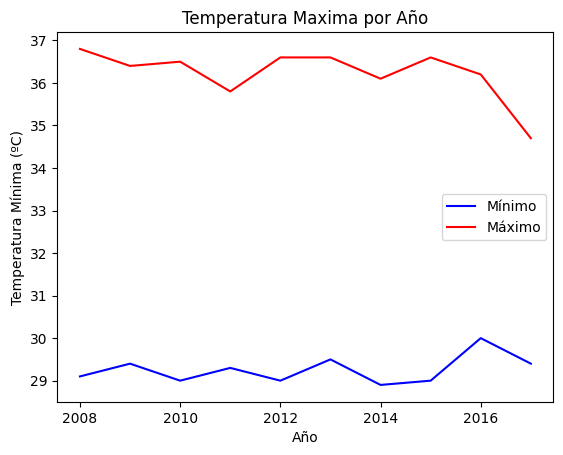

In [61]:
# Gráfico  la temperatura maxima
df_grouped_cuantitativa['MaxTemp'].plot(kind='line', color=['blue', 'red'])
plt.title('Temperatura Maxima por Año')
plt.xlabel('Año')
plt.ylabel('Temperatura Mínima (ºC)')
plt.legend(['Mínimo', 'Máximo'])
plt.show()

Basado en este gráfico, se puede sugerir que la temperatura máxima en Darwin ha mostrado una tendencia ligeramente decreciente en los últimos años.

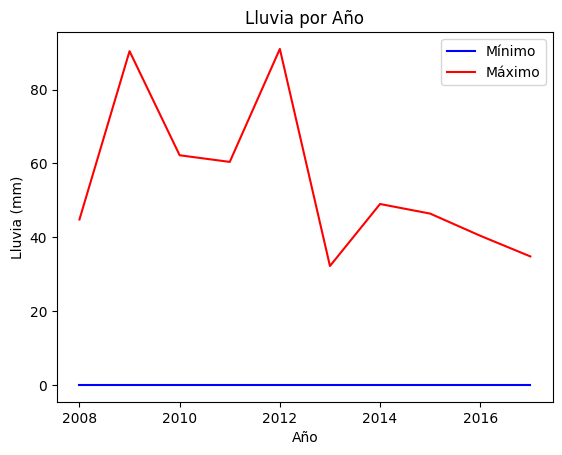

In [62]:
# Gráfico de lluvia
df_grouped_cuantitativa['Rainfall'].plot(kind='line', color=['blue', 'red'])
plt.title('Lluvia por Año')
plt.xlabel('Año')
plt.ylabel('Lluvia (mm)')
plt.legend(['Mínimo', 'Máximo'])
plt.show()

Basado en este gráfico, se puede concluir que la cantidad de lluvia en Darwin ha sido altamente variable a lo largo de los años analizados. No se observa una tendencia clara hacia un aumento o disminución en la precipitación total. Sin embargo, la presencia de años extremadamente secos y otros con precipitaciones muy altas sugiere la ocurrencia de eventos climáticos extremos.

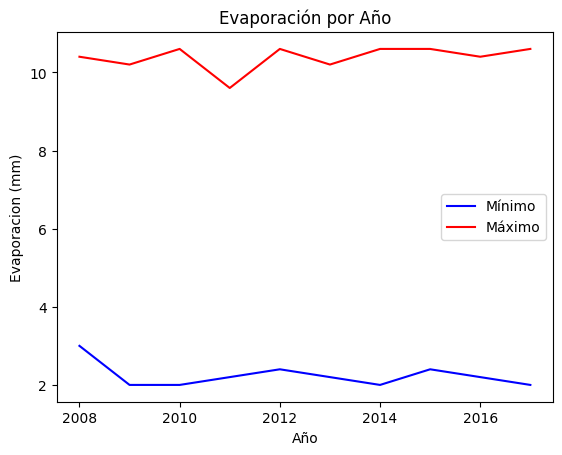

In [63]:
# Gráfico de Evaporacion
df_grouped_cuantitativa['Evaporation'].plot(kind='line', color=['blue', 'red'])
plt.title('Evaporación por Año')
plt.xlabel('Año')
plt.ylabel('Evaporacion (mm)')
plt.legend(['Mínimo', 'Máximo'])
plt.show()

Basado en este gráfico, se puede concluir que la evaporación en Darwin ha sido altamente variable a lo largo de los años analizados. No se observa una tendencia clara hacia un aumento o disminución en la evaporación total. Sin embargo, la presencia de años con evaporación extremadamente alta y otros con evaporación muy baja sugiere que la evaporación está fuertemente influenciada por las condiciones climáticas variables.

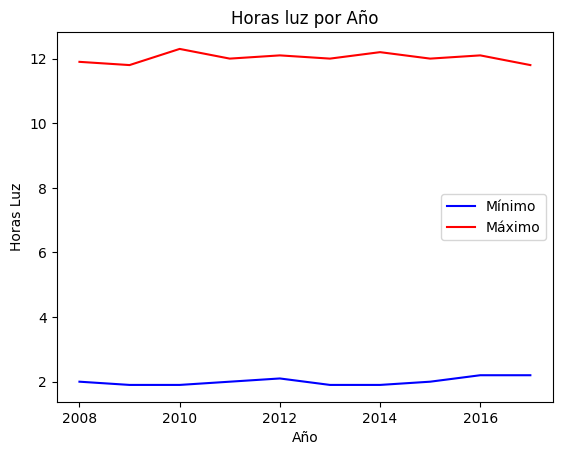

In [64]:
# Gráfico de Horas luz
df_grouped_cuantitativa['Sunshine'].plot(kind='line', color=['blue', 'red'])
plt.title('Horas luz por Año')
plt.xlabel('Año')
plt.ylabel('Horas Luz')
plt.legend(['Mínimo', 'Máximo'])
plt.show()

Basado en este grafico las horas luz siguen siendo constante y no han sido varibles en Darwin.

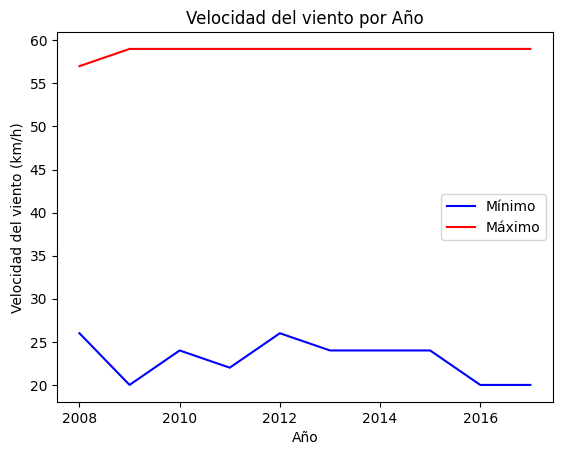

In [65]:
# Gráfico de velocidad del viento
df_grouped_cuantitativa['WindGustSpeed'].plot(kind='line', color=['blue', 'red'])
plt.title('Velocidad del viento por Año')
plt.xlabel('Año')
plt.ylabel('Velocidad del viento (km/h)')
plt.legend(['Mínimo', 'Máximo'])
plt.show()

Basado en este gráfico, se puede concluir que la velocidad del viento en Darwin ha sido altamente variable a lo largo de los años analizados. Si bien existe una ligera tendencia decreciente en la velocidad máxima del viento entre 2010 y 2014, esta tendencia no es del todo clara y podría estar influenciada por eventos climáticos específicos.

# **Analisis Multivariado**

# **Mapa de calor de correlacion entre variables climaticas cuantitativas**

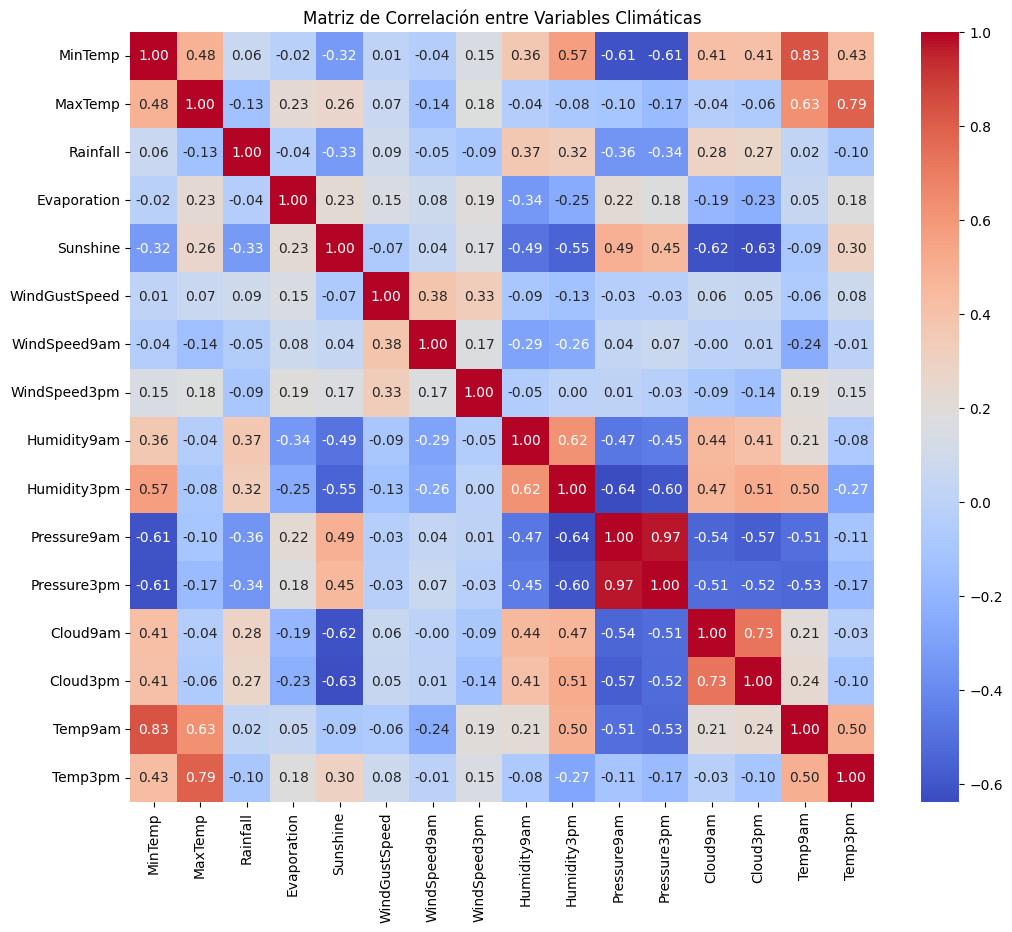

In [43]:
plt.figure(figsize=(12, 10))
sns.heatmap(df_clean_outliers[quantitative].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de Correlación entre Variables Climáticas")
plt.show()

# **Radar de variables climatologicas durante 2013-2017**

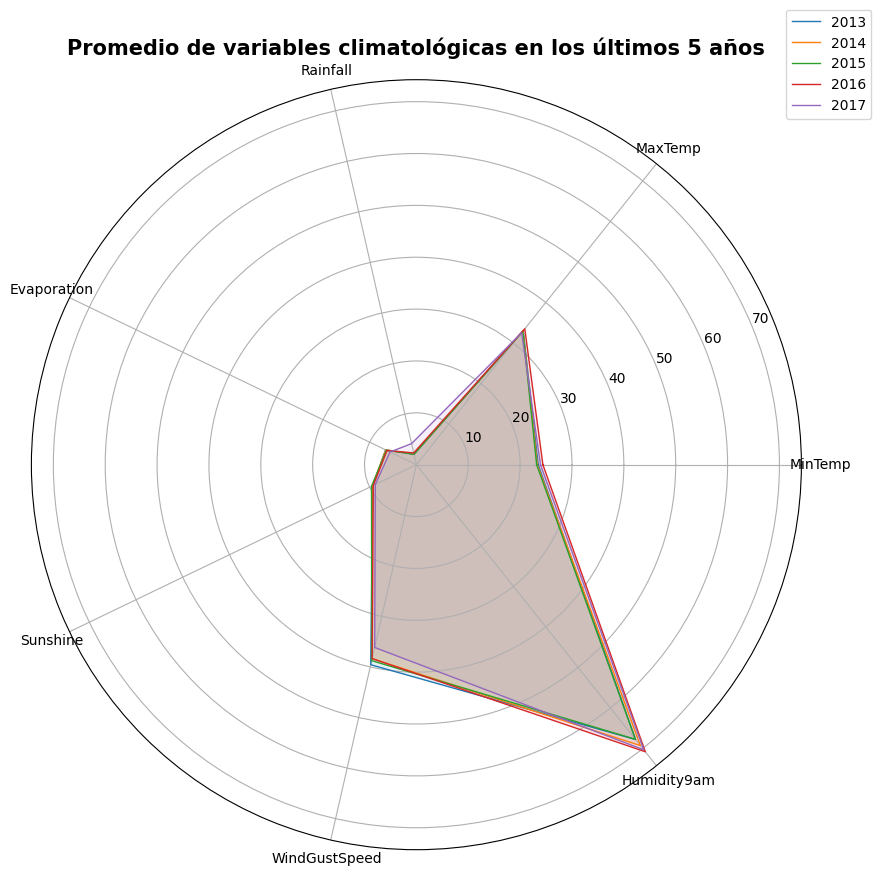

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import pi

# Filtrar los datos de los últimos 5 años
df_clean_outliers['Year'] = pd.to_datetime(df['Date']).dt.year
ultimo_anio = df_clean_outliers['Year'].max()
df_ultimos_5 = df_clean_outliers[df_clean_outliers['Year'] >= ultimo_anio - 4]

# Calcular el promedio de cada variable por año
variables = ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
             'WindGustSpeed', 'Humidity9am']
df_agrupado = df_ultimos_5.groupby('Year')[variables].mean()

# Configuración del gráfico radar
labels = variables
num_vars = len(labels)

# Ángulo de cada variable en el gráfico radar
angles = [n / float(num_vars) * 2 * pi for n in range(num_vars)]
angles += angles[:1]  # Cerrar el gráfico

# Inicializar el gráfico
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(polar=True))

# Dibujar una línea para cada año
for i, (index, row) in enumerate(df_agrupado.iterrows()):
    values = row.tolist()
    values += values[:1]  # Cerrar el gráfico
    ax.plot(angles, values, linewidth=1, linestyle='solid', label=index)
    ax.fill(angles, values, alpha=0.1)  # Relleno

# Añadir las etiquetas
ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels, fontsize=10)

# Añadir leyenda y título
plt.legend(loc='upper right', bbox_to_anchor=(1.1, 1.1))
plt.title("Promedio de variables climatológicas en los últimos 5 años", size=15, weight='bold')
plt.show()

Se analizo las variables climatologicas para los años 2013 al 2017 de los cuales podemos decir lo siguiente:

* Los poligonos tienen formas similares, lo cual sugiere que las condiciones climaticas generales se mantuvieron relativamente estables a lo largo de los años.
* los poligonos estan minimamente separados unos de otros, lo cual nos indica que hay una variabilidad interanual en las condiciones climatologicas.
* Tambien se puede observar las relaciones entre variables, como por ejemplo si los poligonos tienen valores altos de precipitacion tambien tienen valores altos de humedad.

# **Grafico de dispercion de las variables cuantitativas con respecto a Rainfall (precipitacion)**

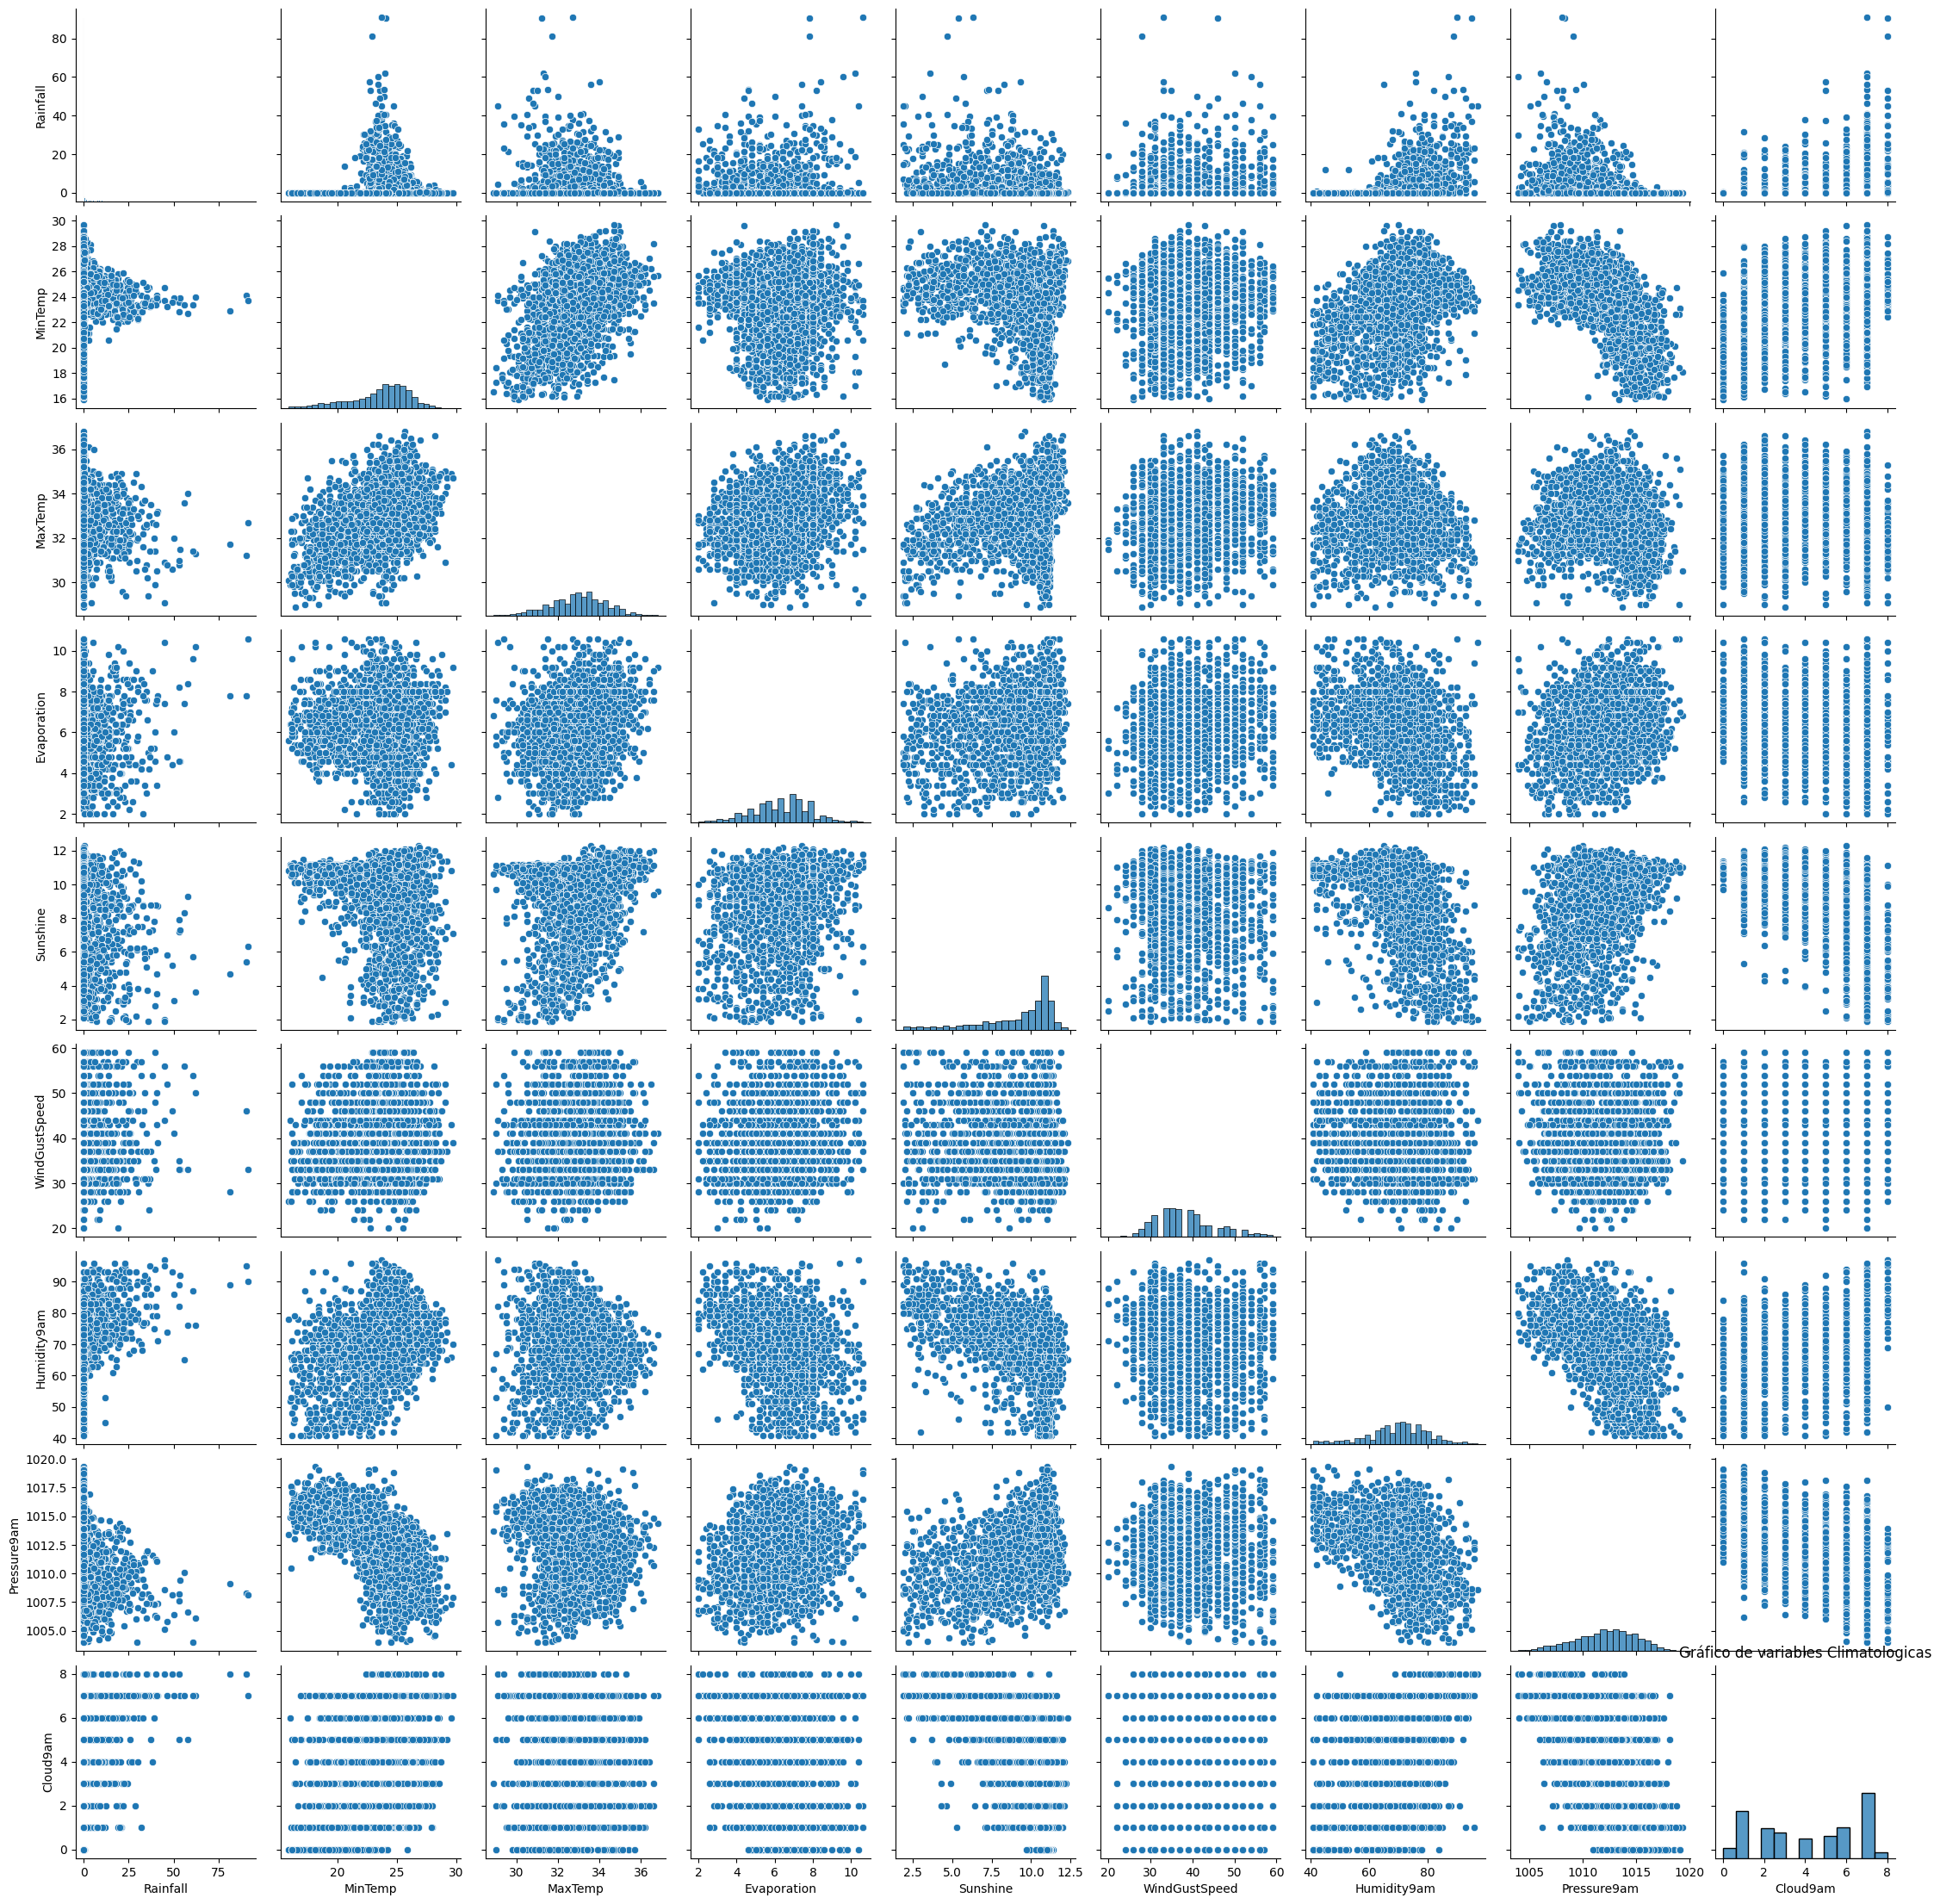

In [78]:
# Seleccionar variables climatologicas específicas para el pairplot
variables_climatologicas = df_clean_outliers[['Rainfall', 'MinTemp', 'MaxTemp', 'Evaporation','Sunshine', 'WindGustSpeed',  'Humidity9am',  'Pressure9am','Cloud9am']]

# Crear el pairplot
sns.pairplot(variables_climatologicas)
plt.title('Gráfico de variables Climatologicas')
plt.show()


Nos concentraremos en las correlaciones que hay entre Rainfall (precipitacion) con las demas variables, utilizamos las variables de las 9 am.

Correlaciones positivas: Mediante los graficos podemos observar las siguientes correlaciones positiva entre Rainfall (Precipitacion) con Humidity9am y la Evaporation, por otro lado, existe una correlacion positiva con Cloud9am y WindGustSpeed aunque no se encuentran perfectamente alineados en una línea recta, lo que indica que la relación entre ambas variables no es perfecta. Existen casos en los que llueve mucho pero hay pocas nubes, y viceversa.

Correlaciones negativas: Meidante los graficos podemos observar las siguientes correlaciones negativas entre Rainfall (Precipitacion) con Pressure9am, Sunshine,MaxTemp y MinTemp.



# **Relación entre Temperatura Máxima y Humedad a las 3 PM y Si llueve mañana**

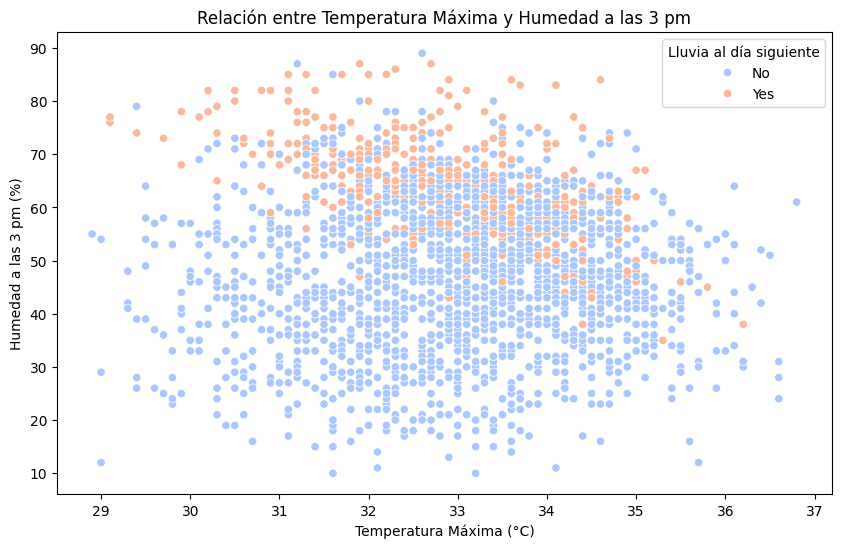

In [41]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_clean_outliers, x='MaxTemp', y='Humidity3pm', hue='RainTomorrow', palette='coolwarm')
plt.title("Relación entre Temperatura Máxima y Humedad a las 3 pm")
plt.xlabel("Temperatura Máxima (°C)")
plt.ylabel("Humedad a las 3 pm (%)")
plt.legend(title="Lluvia al día siguiente")
plt.show()

Este gráfico de dispersión nos permite visualizar la relación entre dos variables meteorológicas clave: la temperatura máxima del día (en el eje X) y la humedad relativa a las 3 de la tarde (en el eje Y). Además, los puntos están coloreados de acuerdo a si llovió o no al día siguiente, lo que nos ayuda a entender si estas variables tienen alguna influencia en la probabilidad de lluvia.

Los puntos están bastante dispersos en el gráfico, lo que indica que no existe una relación lineal perfecta entre la temperatura máxima y la humedad. Es decir, no podemos afirmar que a mayor temperatura siempre haya mayor humedad, o viceversa.

Se observa una concentración de puntos azules (lluvia al día siguiente) en la zona superior derecha del gráfico, donde tanto la temperatura como la humedad son altas. Esto sugiere que una combinación de alta temperatura y alta humedad aumenta la probabilidad de lluvia al día siguiente.

En la parte inferior del gráfico, donde la humedad es baja, hay una menor proporción de puntos azules, indicando que es menos probable que llueva al día siguiente en condiciones de baja humedad.

Sin embargo, es importante notar que hay excepciones a esta tendencia. Existen puntos azules en zonas de baja humedad y puntos naranjas (sin lluvia) en zonas de alta humedad y temperatura. Esto indica que la temperatura y la humedad no son los únicos factores que determinan si lloverá o no.

# **Conclusiones**

# **Principales hallazgos:**
* *Estabilidad térmica*: Las temperaturas en Darwin muestran una relativa estabilidad a lo largo del año, aunque con variaciones diurnas significativas.
* *Alta humedad*: Los niveles de humedad son generalmente altos, especialmente durante la temporada húmeda, lo que contribuye a las sensaciones de calor y sofoco.
* *Relación entre variables*: Existe una estrecha relación entre las variables climáticas analizadas. Por ejemplo, la temperatura y la humedad muestran una relación inversa, mientras que la temperatura y la radiación solar están directamente relacionadas.
* *Influencia de la nubosidad*: La nubosidad juega un papel crucial en la regulación de la temperatura y la humedad, ya que las nubes actúan como un escudo que reduce la radiación solar y aumenta la humedad relativa.
* *Ciclos estacionales*: A pesar de la relativa estabilidad térmica, se espera que existan variaciones estacionales en las variables climáticas, con una temporada más seca y otra más húmeda.
* *Eventos extremos*: Los eventos climáticos extremos, como ciclones tropicales, pueden causar fluctuaciones significativas en las variables climáticas y tener un impacto significativo en la región.

# **Implicaciones**

* *Adaptación humana*: Los habitantes de Darwin deben adaptarse a un clima cálido y húmedo, lo que implica el uso de sistemas de refrigeración, ropa adecuada y la construcción de viviendas que permitan una buena ventilación.
* *Actividades económicas*: El clima influye en actividades económicas como la agricultura, el turismo y la pesca. Por ejemplo, la temporada de lluvias puede afectar la producción agrícola y el turismo.
* *Gestión de recursos hídricos*: La alta humedad y las lluvias estacionales pueden generar desafíos en la gestión del agua, como inundaciones y sequías.
Cambio climático: Es importante monitorear las tendencias a largo plazo del clima de Darwin para evaluar los posibles impactos del cambio climático en la región.

En conclusión, el clima de Darwin presenta características típicas de un clima tropical, con altas temperaturas y humedad. La comprensión de estos patrones climáticos es fundamental para la planificación y gestión de los recursos naturales y para la adaptación al cambio climático.

# **Preprocesamiento de datos**

**Codificación de variables categóricas**

In [69]:
from sklearn.impute import SimpleImputer

In [70]:
# 1. Crear un numpy array con los valores
valores = df[quantitative].values
# 2. Definir el imputador
imputador = SimpleImputer(missing_values=np.nan, strategy='mean')
# 3. transformar el dataset
transformados = imputador.fit_transform(valores)
# 4.Contar el numero de NaN en cada columna
print('Missing: %d' % np.isnan(transformados).sum())
# 5. Transformar array en DataFrame
transformados=pd.DataFrame(transformados)
#transformados= transformados.rename(columns={0: "NEMB", 1: "GLU", 2: "PART",3:"GROS",4:"HUR",5:"BMI",6:"FPRED",7:"AGE",8:"CLASS"})
print(transformados.head().round(2))

Missing: 0
     0     1    2    3     4     5     6     7     8     9       10      11  \
0  20.0  33.1  0.0  4.4  11.0  41.0  13.0  17.0  81.0  32.0  1016.0  1012.1   
1  19.4  32.4  0.0  6.0  10.4  50.0  15.0  28.0  81.0  17.0  1016.8  1012.4   
2  18.2  31.8  0.0  8.0  11.0  46.0  22.0  19.0  38.0  24.0  1017.2  1013.0   
3  17.3  30.7  0.0  7.0  10.4  44.0  22.0  13.0  55.0  16.0  1017.3  1013.6   
4  15.5  30.8  0.0  7.0  10.8  46.0  20.0  19.0  37.0  16.0  1016.3  1012.6   

    12   13    14    15  
0  1.0  2.0  25.4  32.3  
1  1.0  1.0  24.3  31.9  
2  0.0  1.0  24.3  31.2  
3  2.0  6.0  21.3  29.8  
4  1.0  1.0  22.2  29.6  


In [71]:
transformados

0          1    2    3         4          5     6     7     8     9   \
0     20.0  33.100000  0.0  4.4  11.00000  41.000000  13.0  17.0  81.0  32.0   
1     19.4  32.400000  0.0  6.0  10.40000  50.000000  15.0  28.0  81.0  17.0   
2     18.2  31.800000  0.0  8.0  11.00000  46.000000  22.0  19.0  38.0  24.0   
3     17.3  30.700000  0.0  7.0  10.40000  44.000000  22.0  13.0  55.0  16.0   
4     15.5  30.800000  0.0  7.0  10.80000  46.000000  20.0  19.0  37.0  16.0   
...    ...        ...  ...  ...       ...        ...   ...   ...   ...   ...   
3188  21.2  32.600000  0.0  7.6   8.60000  37.000000  13.0  11.0  56.0  28.0   
3189  20.7  32.800000  0.0  5.6  11.00000  33.000000  17.0  11.0  46.0  23.0   
3190  19.5  31.800000  0.0  6.2  10.60000  26.000000   9.0  17.0  62.0  58.0   
3191  20.2  31.700000  0.0  5.6  10.70000  30.000000  15.0   7.0  73.0  32.0   
3192  19.3  32.540977  0.0  5.0   8.49931  40.582355  13.0  17.0  68.0  45.0   

          10      11   12   13    14    15  
0     1016.0  1012.1  1.0  2.0  25.4  32.3  
1     1016.8  1012.4  1.0  1.0  24.3  31.9  
2     1017.2  1013.0  0.0  1.0  24.3  31.2  
3     1017.3  1013.6  2.0  6.0  21.3  29.8  
4     1016.3  1012.6  1.0  1.0  22.2  29.6  
...      ...     ...  ...  ...   ...   ...  
3188  1014.6  1011.2  7.0  0.0  24.8  32.0  
3189  1015.3  1011.8  0.0  0.0  24.8  32.1  
3190  1014.9  1010.7  1.0  1.0  24.8  29.2  
3191  1013.9  1009.7  6.0  5.0  25.4  31.0  
3192  1013.9  1010.7  6.0  1.0  24.6  29.0  

[3193 rows x 16 columns]

In [72]:
transformados= transformados.rename(columns={0: "MinTemp", 1: "MaxTemp", 2: "PART",3:"Rainfall",4:"Evaporation",5:"Sunshine",6:"WindGustSpeed",7:"WindSpeed9am",8:"WindSpeed3pm", 9:"Humidity9am",10:"Humidity3pm",11:"Pressure9am",12:"Cloud9am",13:"Cloud3pm",14:"Temp9am",15:"Temp3pm"})
transformados

MinTemp    MaxTemp  PART  Rainfall  Evaporation   Sunshine  \
0        20.0  33.100000   0.0       4.4     11.00000  41.000000   
1        19.4  32.400000   0.0       6.0     10.40000  50.000000   
2        18.2  31.800000   0.0       8.0     11.00000  46.000000   
3        17.3  30.700000   0.0       7.0     10.40000  44.000000   
4        15.5  30.800000   0.0       7.0     10.80000  46.000000   
...       ...        ...   ...       ...          ...        ...   
3188     21.2  32.600000   0.0       7.6      8.60000  37.000000   
3189     20.7  32.800000   0.0       5.6     11.00000  33.000000   
3190     19.5  31.800000   0.0       6.2     10.60000  26.000000   
3191     20.2  31.700000   0.0       5.6     10.70000  30.000000   
3192     19.3  32.540977   0.0       5.0      8.49931  40.582355   

      WindGustSpeed  WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  \
0              13.0          17.0          81.0         32.0       1016.0   
1              15.0          28.0          81.0         17.0       1016.8   
2              22.0          19.0          38.0         24.0       1017.2   
3              22.0          13.0          55.0         16.0       1017.3   
4              20.0          19.0          37.0         16.0       1016.3   
...             ...           ...           ...          ...          ...   
3188           13.0          11.0          56.0         28.0       1014.6   
3189           17.0          11.0          46.0         23.0       1015.3   
3190            9.0          17.0          62.0         58.0       1014.9   
3191           15.0           7.0          73.0         32.0       1013.9   
3192           13.0          17.0          68.0         45.0       1013.9   

      Pressure9am  Cloud9am  Cloud3pm  Temp9am  Temp3pm  
0          1012.1       1.0       2.0     25.4     32.3  
1          1012.4       1.0       1.0     24.3     31.9  
2          1013.0       0.0       1.0     24.3     31.2  
3          1013.6       2.0       6.0     21.3     29.8  
4          1012.6       1.0       1.0     22.2     29.6  
...           ...       ...       ...      ...      ...  
3188       1011.2       7.0       0.0     24.8     32.0  
3189       1011.8       0.0       0.0     24.8     32.1  
3190       1010.7       1.0       1.0     24.8     29.2  
3191       1009.7       6.0       5.0     25.4     31.0  
3192       1010.7       6.0       1.0     24.6     29.0  

[3193 rows x 16 columns]

In [73]:
df

Date Location   Latitud   Longitud  MinTemp  MaxTemp  Rainfall  \
0    2008-07-01   Darwin -12.46113  130.84185     20.0     33.1       0.0   
1    2008-07-02   Darwin -12.46113  130.84185     19.4     32.4       0.0   
2    2008-07-03   Darwin -12.46113  130.84185     18.2     31.8       0.0   
3    2008-07-04   Darwin -12.46113  130.84185     17.3     30.7       0.0   
4    2008-07-05   Darwin -12.46113  130.84185     15.5     30.8       0.0   
...         ...      ...       ...        ...      ...      ...       ...   
3188 2017-06-21   Darwin -12.46113  130.84185     21.2     32.6       0.0   
3189 2017-06-22   Darwin -12.46113  130.84185     20.7     32.8       0.0   
3190 2017-06-23   Darwin -12.46113  130.84185     19.5     31.8       0.0   
3191 2017-06-24   Darwin -12.46113  130.84185     20.2     31.7       0.0   
3192 2017-06-25   Darwin -12.46113  130.84185     19.3      NaN       0.0   

      Evaporation  Sunshine WindGustDir  ...  Pressure3pm Cloud9am Cloud3pm  \
0             4.4      11.0           E  ...       1012.1      1.0      2.0   
1             6.0      10.4         ENE  ...       1012.4      1.0      1.0   
2             8.0      11.0           E  ...       1013.0      0.0      1.0   
3             7.0      10.4           E  ...       1013.6      2.0      6.0   
4             7.0      10.8         ESE  ...       1012.6      1.0      1.0   
...           ...       ...         ...  ...          ...      ...      ...   
3188          7.6       8.6           E  ...       1011.2      7.0      0.0   
3189          5.6      11.0           E  ...       1011.8      0.0      0.0   
3190          6.2      10.6         ESE  ...       1010.7      1.0      1.0   
3191          5.6      10.7         ENE  ...       1009.7      6.0      5.0   
3192          5.0       NaN         NaN  ...       1010.7      6.0      1.0   

      Temp9am  Temp3pm  RainToday  RainTomorrow  year  month  day  
0        25.4     32.3         No            No  2008      7    1  
1        24.3     31.9         No            No  2008      7    2  
2        24.3     31.2         No            No  2008      7    3  
3        21.3     29.8         No            No  2008      7    4  
4        22.2     29.6         No            No  2008      7    5  
...       ...      ...        ...           ...   ...    ...  ...  
3188     24.8     32.0         No            No  2017      6   21  
3189     24.8     32.1         No            No  2017      6   22  
3190     24.8     29.2         No            No  2017      6   23  
3191     25.4     31.0         No            No  2017      6   24  
3192     24.6     29.0         No           NaN  2017      6   25  

[3193 rows x 28 columns]

Las siguientes variables tienen valores nulos
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267


In [74]:
df[quantitative].isnull().sum()

MinTemp           1
MaxTemp           1
Rainfall          0
Evaporation      54
Sunshine          4
WindGustSpeed    42
WindSpeed9am      2
WindSpeed3pm      2
Humidity9am       1
Humidity3pm       2
Pressure9am       1
Pressure3pm       2
Cloud9am          1
Cloud3pm          3
Temp9am           0
Temp3pm           2
dtype: int64

In [75]:
from typing import Counter
from itertools import groupby
groupby(df['Location'], key=lambda x: x)
# You likely want to count the occurrences of each location afterwards, for example:
# from collections import Counter
# Counter(df['Location'])
Counter(groupby(df['Location'], key=lambda x: x))

Counter({('Darwin', <itertools._grouper at 0x7d6dd03ba200>): 1})

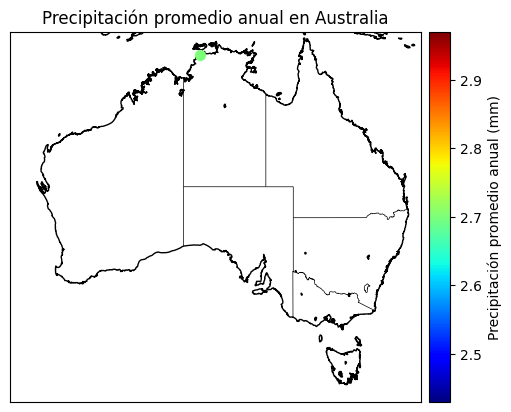

In [77]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

# Crear el mapa
map = Basemap(projection='merc',
               llcrnrlat=-45,
               urcrnrlat=-10,
               llcrnrlon=110,
               urcrnrlon=155,
               resolution='i')

# Dibujar el mapa base
map.drawcoastlines()
map.drawcountries()
map.drawstates()

# Convertir coordenadas y crear el mapa de calor
lons, lats = map(df_clean_outliers['Longitud'].values, df_clean_outliers['Latitud'].values)
df_grouped_2 = df_clean_outliers.groupby(['Latitud', 'Longitud'])['Rainfall'].mean().reset_index()
lons, lats = map(df_grouped_2['Longitud'].values, df_grouped_2['Latitud'].values)
map.scatter(lons, lats, c=df_grouped_2['Rainfall'], s=50, cmap='jet', zorder=2)
map.colorbar(label='Precipitación promedio anual (mm)')

# Agregar títulos y mostrar el mapa
plt.title('Precipitación promedio anual en Australia')
plt.show()